# **LoanTap - Logistic Regression**

**About LoanTap**

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:
> * Personal Loan
> * EMI Free Loan
> * Personal Overdraft
> * Advance Salary Loan

Here we focus on the underwriting process behind **Personal Loan** only

**Problem Statement:**

* Given a set of attributes for an Individual, determine if a credit line should be extended to them. 
* If so, what should the repayment terms be in business recommendations?


**Data dictionary:**

> * **loan_amnt :** The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
> * **term :** The number of payments on the loan. Values are in months and can be either 36 or 60.
> * **int_rate :** Interest Rate on the loan
> * **installment :** The monthly payment owed by the borrower if the loan originates.
> * **grade :** LoanTap assigned loan grade
> * **sub_grade :** LoanTap assigned loan subgrade
> * **emp_title :**The job title supplied by the Borrower when applying for the loan.*
> * **emp_length :** Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
> * **home_ownership :** The home ownership status provided by the borrower during registration or obtained from the credit report.
> * **annual_inc :** The self-reported annual income provided by the borrower during registration.
> * **verification_status :** Indicates if income was verified by LoanTap, not verified, or if the income source was verified
> * **issue_d :** The month which the loan was funded
> * **loan_status :** Current status of the loan - **Target Variable**
>>* Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
>>* Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan
> * **purpose :** A category provided by the borrower for the loan request.
> * **title :** The loan title provided by the borrower
> * **dti :** A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
> * **earliest_cr_line :** The month the borrower's earliest reported credit line was opened
> * **open_acc :** The number of open credit lines in the borrower's credit file.
> * **pub_rec :** Number of derogatory public records
> * **revol_bal :** Total credit revolving balance
> * **revol_util :** Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
> * **total_acc :** The total number of credit lines currently in the borrower's credit file
> * **initial_list_status :** The initial listing status of the loan. Possible values are – W, F
> * **application_type :** Indicates whether the loan is an individual application or a joint application with two co-borrowers
> * **mort_acc :** Number of mortgage accounts.
> * **pub_rec_bankruptcies :** Number of public record bankruptcies
> * **Address:** Address of the individual

>**Target variable is Loan_Status**

**Concept Used:**

> * Exploratory Data Analysis
> * Feature Engineering
> * Logistic Regression
> * Precision Vs Recall Tradeoff

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.ticker as mticker
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [3]:
# Loading the dataset
df = pd.read_csv("logistic_regression.txt")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
# Examine shape of dataset
df.shape

(396030, 27)

In [5]:
# check for the data types of values provided and see if any columns has the missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

**Observations :**
* The dataset has 396030 rows and 27 columns.
* There are missing values in the data for emp_title, emp_length, title, revol_util, mort_acc and pub_rec_bankruptcies features.
* The features are of numerical and object datatype.

In [6]:
# Statistical summary for numerical variables.
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.89,8357.44,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.64,4.47,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.85,250.73,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.18,61637.62,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.38,18.02,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.31,5.14,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.18,0.53,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.54,20591.84,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.79,24.45,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.41,11.89,2.00,17.00,24.00,32.00,151.00


* The mean and median values for many numerical features are not equal.This gives the idea about presence of outliers in them and data is normally distributed.
* The range of interest rate on the loans is quite wide, from 5.32% to 30.99%. The median interest rate is 13.33%.We see that the distribution is not normal, has multiple peaks, and there are some outliers at the right tail. 
* The maximum loan amount is 40,000 dollars  and the minimum is 500 dollars.The median is 12,000 dollars.The distribution is not normal, has multiple peaks, and there are some outliers at the right tail.
* The range of installments is wide, from 16.08 dollars to 1533.81 dollars per month. The mean is 375.43 dollars.

In [7]:
# Descriptive analysis of categorical columns
df.describe(include = "object").T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


**Observations :**
* There are only two types of loan terms, either 36 months or 60 months.Most of the loans (73%) are shorter, with a term of 36 months.
* The grades assigned based on loan scheme belongs to A,B,C,D,E,F and G 
* The employment length in years ranges from less than 1 year to 10+ years.
* The home ownership status provided by the borrower are from mortgage,rent and self-own categories.

In [8]:
#Get the numbers of missing values in each column
missing = df.isnull().sum()

#Get the percentage of missing values in each column
missing_pct = round(df.isnull().sum()/len(df) * 100, 1)

data_missing = pd.concat([missing, missing_pct], axis=1)
data_missing.columns = ["Count", "Percent"]
print(data_missing)

                      Count  Percent
loan_amnt                 0      0.0
term                      0      0.0
int_rate                  0      0.0
installment               0      0.0
grade                     0      0.0
sub_grade                 0      0.0
emp_title             22927      5.8
emp_length            18301      4.6
home_ownership            0      0.0
annual_inc                0      0.0
verification_status       0      0.0
issue_d                   0      0.0
loan_status               0      0.0
purpose                   0      0.0
title                  1755      0.4
dti                       0      0.0
earliest_cr_line          0      0.0
open_acc                  0      0.0
pub_rec                   0      0.0
revol_bal                 0      0.0
revol_util              276      0.1
total_acc                 0      0.0
initial_list_status       0      0.0
application_type          0      0.0
mort_acc              37795      9.5
pub_rec_bankruptcies    535      0.1
a

In [9]:
# Display the no. of unique values in each column
df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [10]:
df.duplicated().sum()

0

There is no duplicates in the dataset.

In [11]:
# changing object to category dtype
toCategory = ['term', 'grade', 'sub_grade','emp_length', 'home_ownership', 'verification_status','loan_status','initial_list_status','application_type','pub_rec_bankruptcies']
for x in toCategory:
    df[x] = df[x].astype('category')
# changing object to datetime dtype
df['issue_d'] = df['issue_d'].astype('datetime64[ns]')

In [12]:
for x in toCategory:
    print('\033[1m' + "Unique values for Feature : " + x.upper()  + '\033[0m')
    print("Number of Unique values: " + str(df[x].nunique()))
    print(df[x].unique())
    print()
    print('\033[1m' + "Value Counts for Feature : " + x.upper()  + '\033[0m')
    print(df[x].value_counts())
    print()
    print('\033[1m' + "Normalized Value Counts for Feature : " + x.upper()  + '\033[0m')
    print(df[x].value_counts(normalize=True).round(2))
    print()
    print('\033[1m' + "-------------------------------------------------------------------------------------------" + '\033[0m')
    print()

Unique values for Feature : TERM
Number of Unique values: 2
[' 36 months', ' 60 months']
Categories (2, object): [' 36 months', ' 60 months']

Value Counts for Feature : TERM
 36 months    302005
 60 months     94025
Name: term, dtype: int64

Normalized Value Counts for Feature : TERM
 36 months    0.76
 60 months    0.24
Name: term, dtype: float64

-------------------------------------------------------------------------------------------

Unique values for Feature : GRADE
Number of Unique values: 7
['B', 'A', 'C', 'E', 'D', 'F', 'G']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

Value Counts for Feature : GRADE
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

Normalized Value Counts for Feature : GRADE
B    0.29
C    0.27
A    0.16
D    0.16
E    0.08
F    0.03
G    0.01
Name: grade, dtype: float64

-------------------------------------------------------------------------------------------

Unique values for

In [13]:
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = df.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

### **Loan Status - Target variable**

In [14]:
loan_Status = pd.DataFrame((df['loan_status'].value_counts(normalize=True) * 100).round(2))
loan_Status.reset_index(inplace = True)
loan_Status.columns = ['loan_status','percentage']
loan_Status

,loan_status,percentage
0,Fully Paid,80.39
1,Charged Off,19.61


The dataset is **imbalanced** as distribution of target variable (loan status) is non uniform

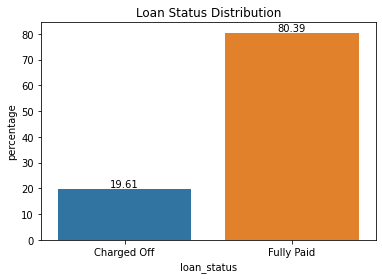

In [15]:
# Univariate analysis
graph = sns.barplot(x = loan_Status['loan_status'], y = loan_Status['percentage'])
for i in graph.containers:
    graph.bar_label(i,)
graph.set_title("Loan Status Distribution")
plt.show()

Around 80.3871% Customers fully paid their loan amount and remaining are charged off.

## Exploratory Data Analysis

### **Univariate Analysis**

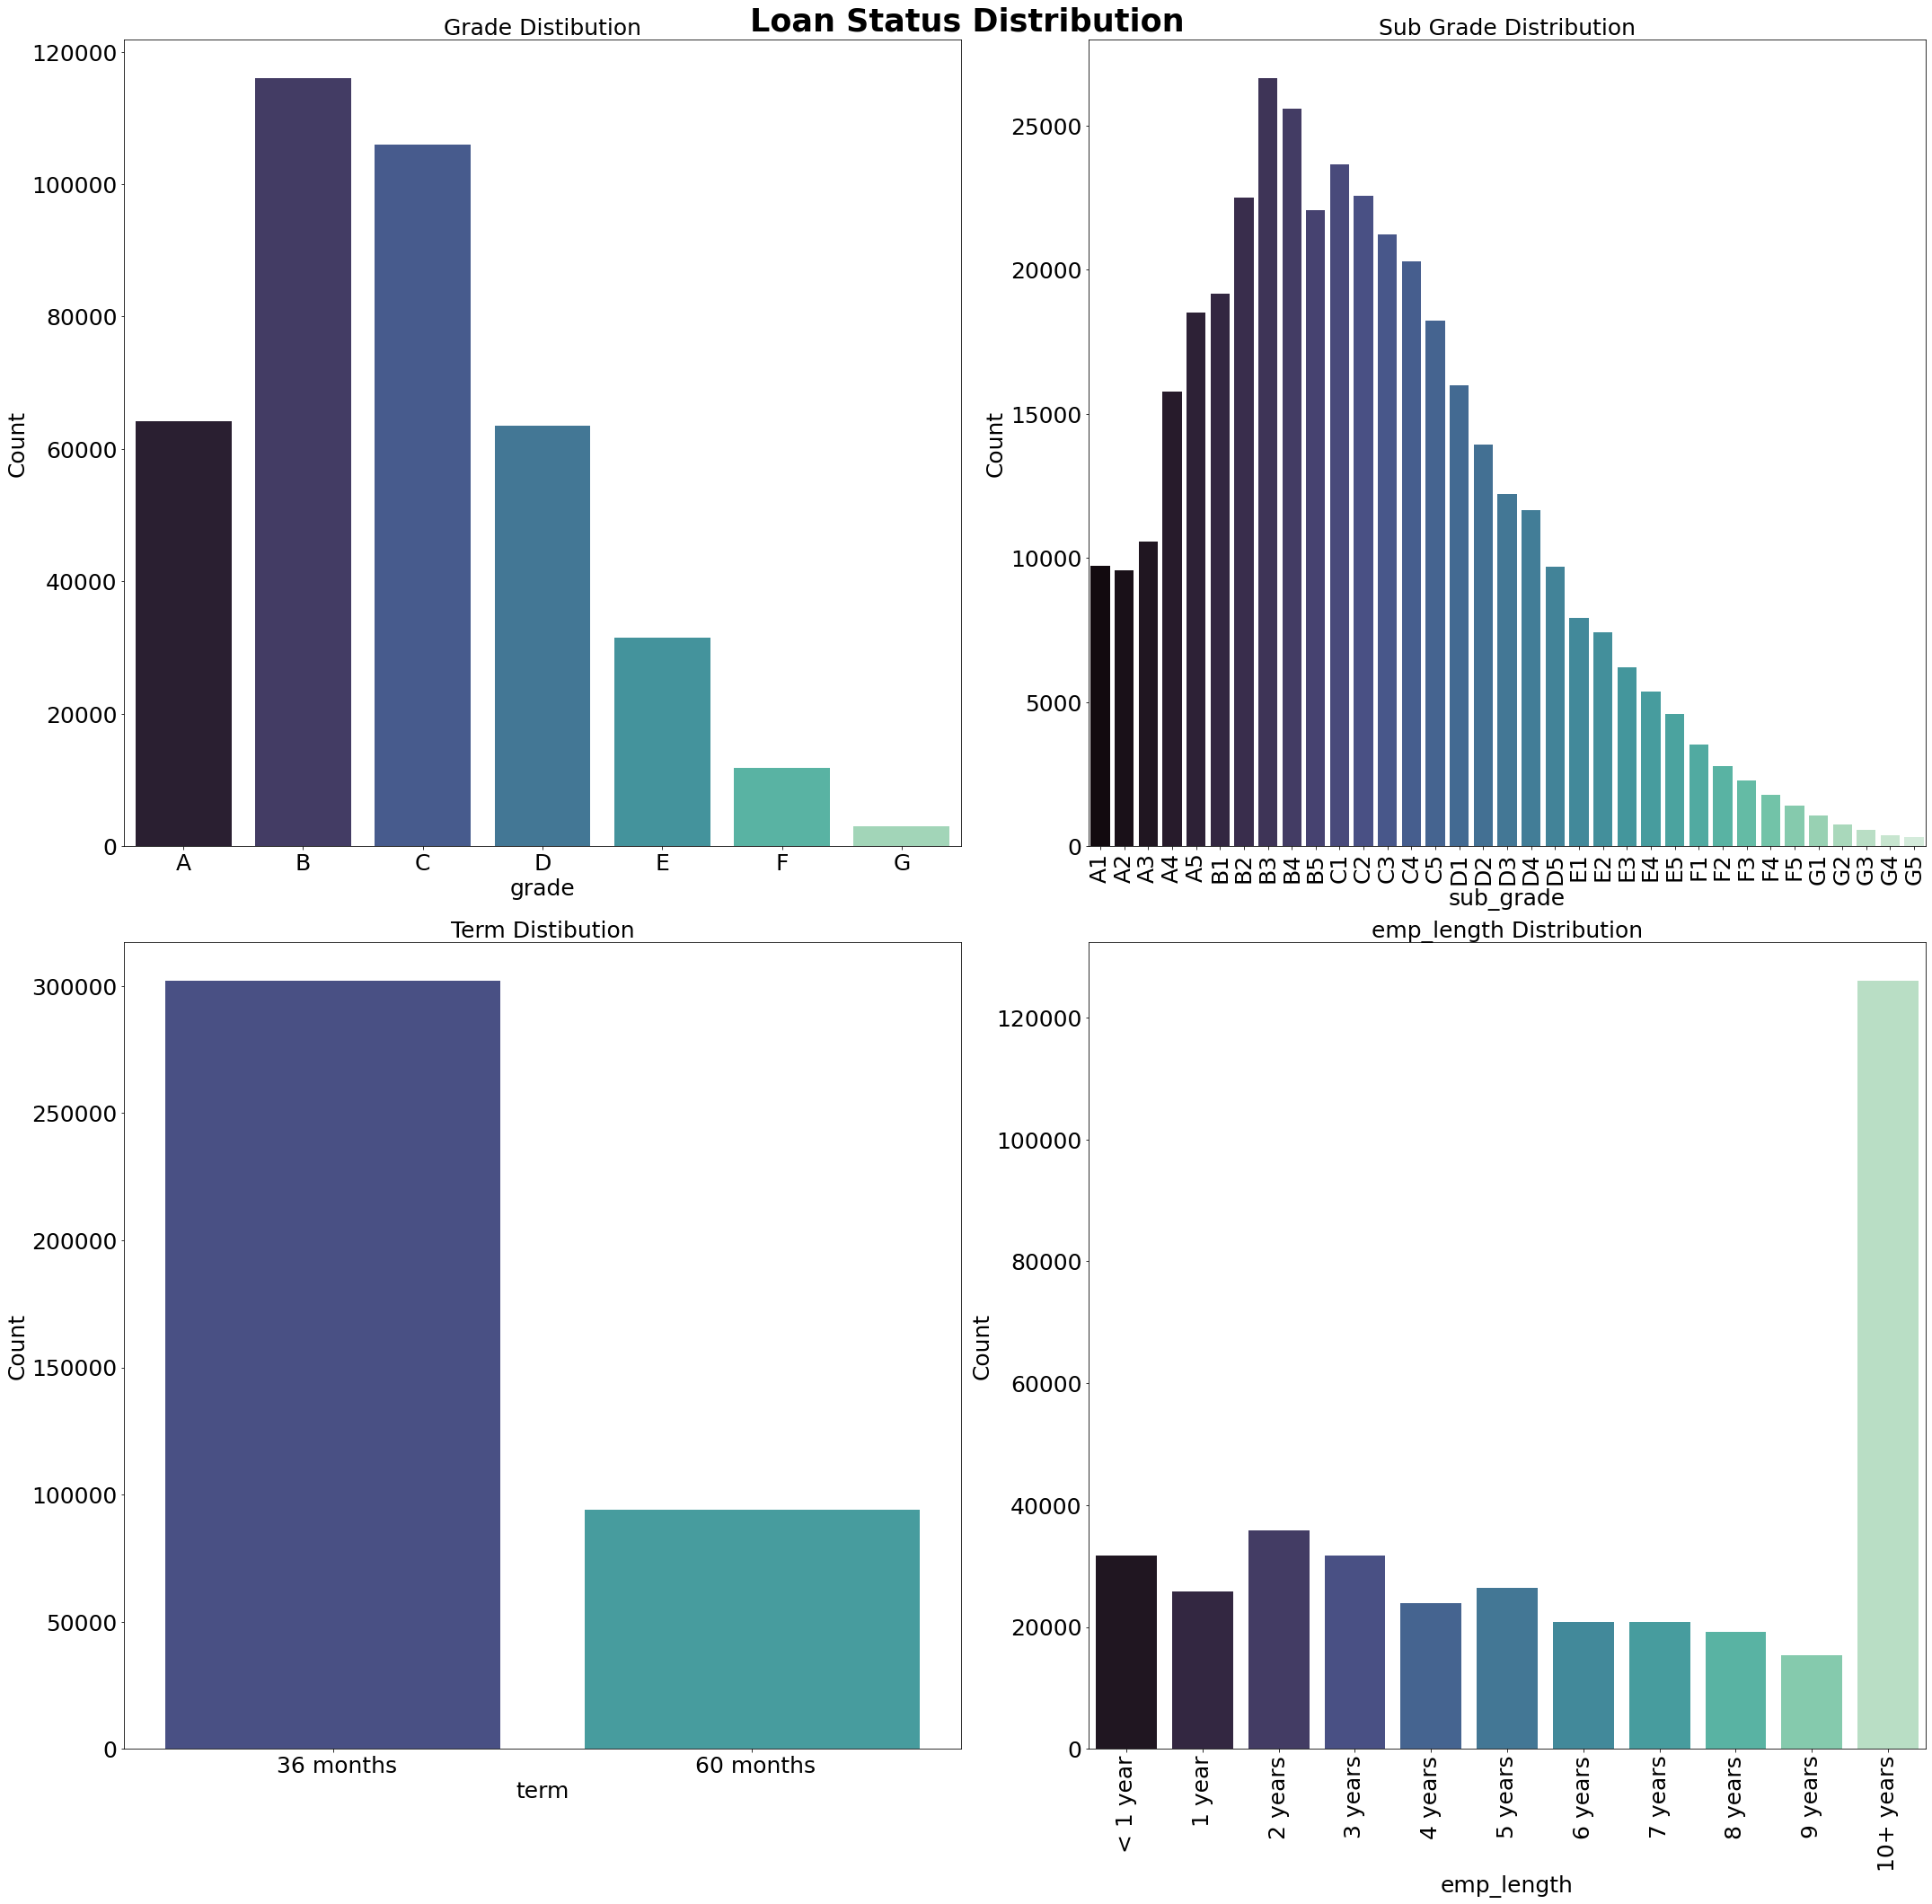

In [16]:
# Univariate analysis for categorical columns
fig, axs = plt.subplots(2, 2, figsize=(30, 30), sharey=False)
fig.suptitle("Loan Status Distribution" , fontsize=35, fontweight='bold')

grade = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
graph = sns.countplot(x = 'grade', data= df, ax = axs[0][0],palette='mako', order = grade)
graph.set_title("Grade Distibution", fontsize = 25)
graph.set_xlabel('grade', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)


sub_grade = sorted(df.sub_grade.unique().tolist())
graph = sns.countplot(x = 'sub_grade', data = df, ax = axs[0][1], palette='mako', order = sub_grade)
graph.set_title("Sub Grade Distribution", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
graph.set_xlabel('sub_grade', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)

graph = sns.countplot(x = 'term', data= df, ax = axs[1][0],palette='mako')
graph.set_title("Term Distibution", fontsize = 25)
graph.set_xlabel('term', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)

order = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years',]
graph = sns.countplot(x = 'emp_length', data = df, ax = axs[1][1], palette='mako', order = order)
graph.set_title("emp_length Distribution", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
graph.set_xlabel('emp_length', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)

plt.tight_layout()
plt.show()

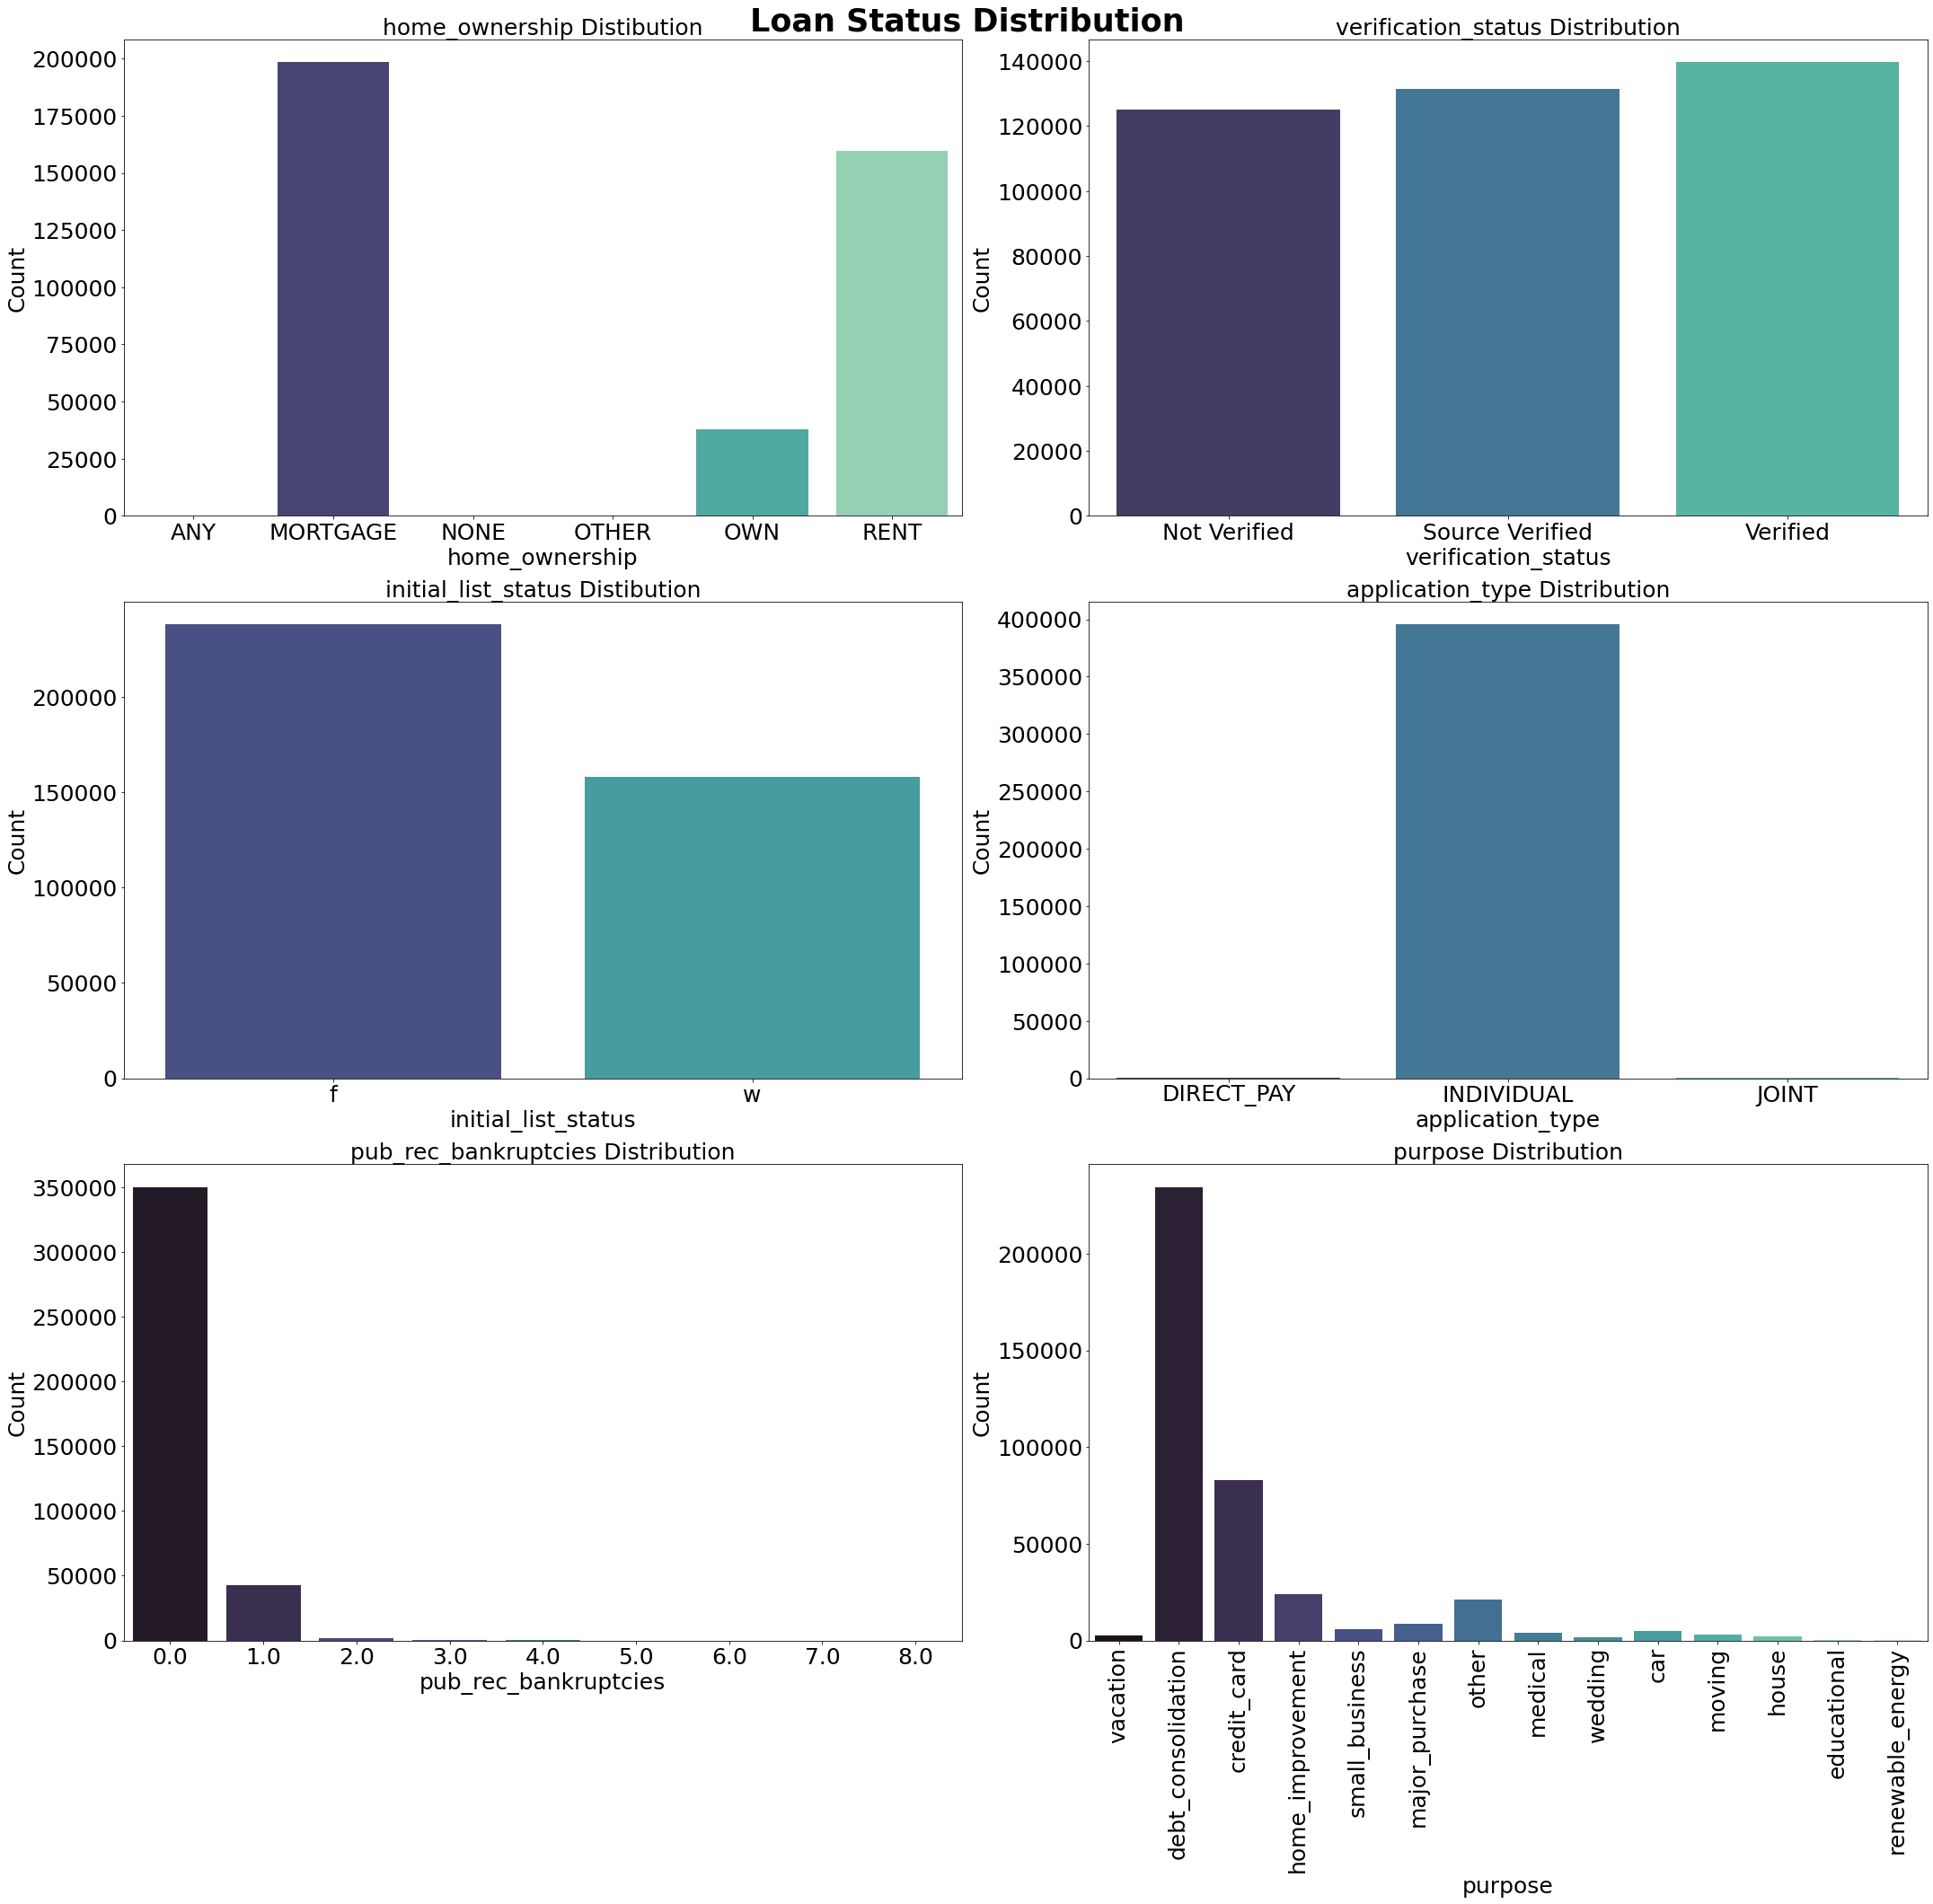

In [17]:
fig, axs = plt.subplots(3, 2, figsize=(30, 30), sharey=False)

fig.suptitle("Loan Status Distribution" , fontsize=35, fontweight='bold')
graph = sns.countplot(x = 'home_ownership', data= df, ax = axs[0][0],palette='mako')
graph.set_title("home_ownership Distibution", fontsize = 25)
graph.set_xlabel('home_ownership', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)

graph = sns.countplot(x = 'verification_status', data = df, ax = axs[0][1], palette='mako')
graph.set_title("verification_status Distribution", fontsize = 25)
graph.set_xlabel('verification_status', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)


graph = sns.countplot(x = 'initial_list_status', data= df, ax = axs[1][0],palette='mako')
graph.set_title("initial_list_status Distibution", fontsize = 25)
graph.set_xlabel('initial_list_status', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)

graph = sns.countplot(x = 'application_type', data = df, ax = axs[1][1], palette='mako')
graph.set_title("application_type Distribution", fontsize = 25)
graph.set_xlabel('application_type', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)

graph = sns.countplot(x = 'pub_rec_bankruptcies', data = df, ax = axs[2][0], palette='mako')
graph.set_title("pub_rec_bankruptcies Distribution", fontsize = 25)
graph.set_xlabel('pub_rec_bankruptcies', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)

graph = sns.countplot(x = 'purpose', data = df, ax = axs[2][1], palette='mako')
graph.set_title("purpose Distribution", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
graph.set_xlabel('purpose', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
plt.tight_layout()
plt.show()

**Observations :**
1. Out of total Customers 76% customers took loan for 36 months while rest of the customers(24%) took loan for 72 months.
2. 29 % of Customers belongs to B grade while 26 % belongs to C grade and remaining 45 % customers belongs to remaining 5 grades.
3. Customers who are employed for 10+ years are 33% followed 9% customers who are employed for 2  years
4. 50 % of total customers who took loan have home_ownership as Mortage, while 40% are in the rent.
5. There are almost equal number of verified, source verified and not verified customers as 35%, 33% and 32% respectively
6. Around 80 % of customers fully paid thier loan and 20 % charged off.
7. Initial listing status of loan is 60% for f and 40 % for w.
8. Almsot 99.82 % Customers have individual application type while remaining has Joint and direct pay application
9. There are 9 unique values of public record bankruptcies. Out of which 90% have no public record of bankrupcies and remaining have some record of bankrupcies.
10. The majority people have home ownership as MORTGAGE. Around 50 Percent of People have MORTAGE type home ownership

array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'int_rate'}>,
        <AxesSubplot:title={'center':'installment'}>],
       [<AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'issue_d'}>,
        <AxesSubplot:title={'center':'dti'}>],
       [<AxesSubplot:title={'center':'open_acc'}>,
        <AxesSubplot:title={'center':'pub_rec'}>,
        <AxesSubplot:title={'center':'revol_bal'}>],
       [<AxesSubplot:title={'center':'revol_util'}>,
        <AxesSubplot:title={'center':'total_acc'}>,
        <AxesSubplot:title={'center':'mort_acc'}>]], dtype=object)

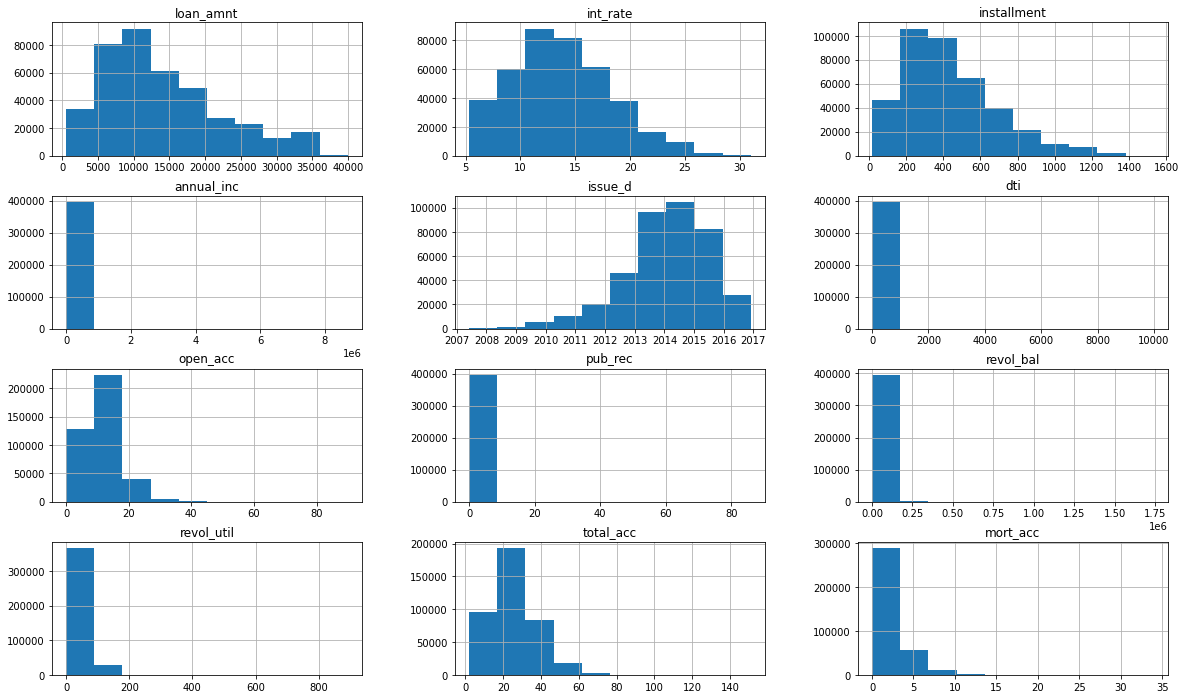

In [18]:
# Univariate analysis for numerical features
df.hist(figsize=(20,12))

In [19]:
def outlierAnalysis(x):
    Q3, Q1 = np.percentile(df[x], [75 ,25])
    IQR = Q3 - Q1
    maxExcludingOutlier = Q3 + 1.5 * IQR
    minExcludingOutlier = Q1 - 1.5 * IQR
    mean = round(df[x].mean(),2)
    median = round(df[x].median(),2)
    mode = round(df[x].mode(), 2)
    print("For the given sample " +x +" Analysis is as Follows: ")
    print("Q1: ", Q1)
    print("Q3: ", Q3)
    print("Mean: ", round(df[x].mean(),2))
    print("Median: ", df[x].median())
    print("Mode: " , round(df[x].mode(), 2))
    print("IQR: " , IQR)
    print("Maximum " + x +" Excluding Outlier: " , maxExcludingOutlier.round(3))
    print("Minimum " + x + " Purchase Excluding Outlier: " , minExcludingOutlier.round(3))

In [20]:
def plotfor_continuousdata(x):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6), squeeze=False)
    plt.suptitle(" Analysis on " + x, fontsize = 15)
    g1 = sns.histplot(df[x], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20)
    g1.axvline(df[x].mean(), ls = '--', color = "red", lw = 2.5, label = "mean")
    g1.axvline(df[x].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median')
    g1.axvline(df[x].mode()[0], ls = '--', color = 'orange', lw = 2.5, label = 'Mode')
    g1.legend()
    stats.probplot(df[x], dist="norm", plot=axs[0, 1])
    plt.tight_layout()
    plt.show()

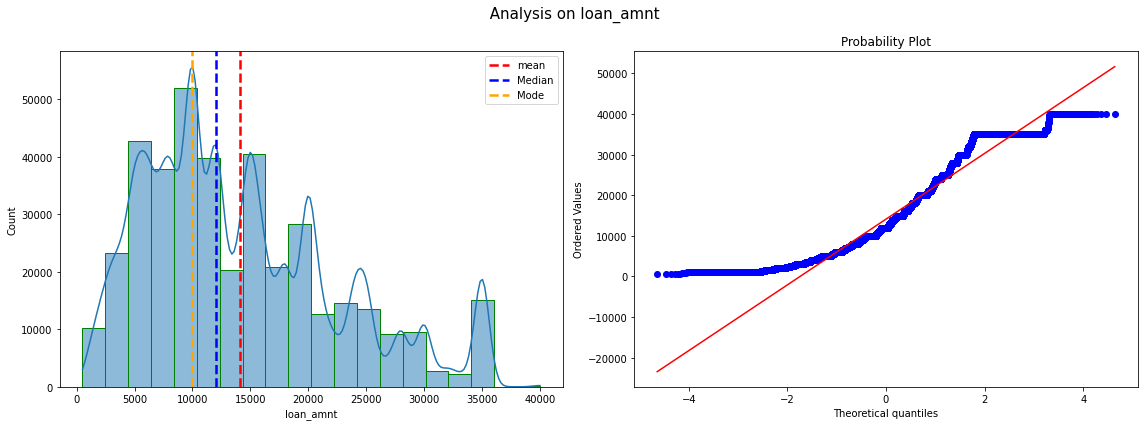

-------------------------------------------------------------------------------------------------------------------


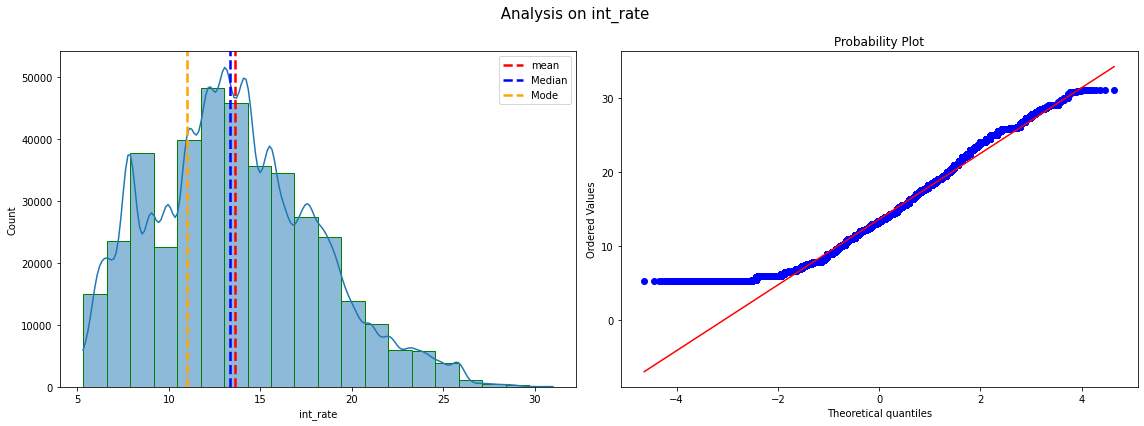

-------------------------------------------------------------------------------------------------------------------


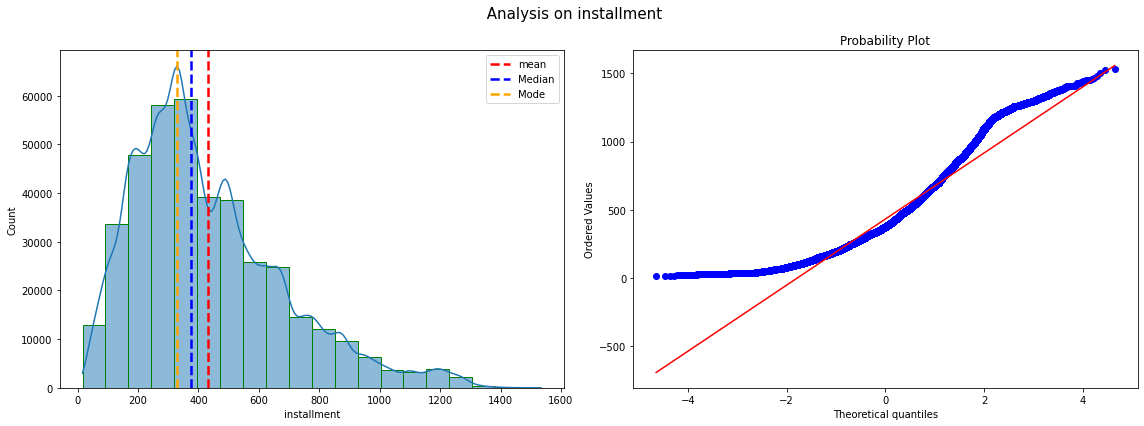

-------------------------------------------------------------------------------------------------------------------


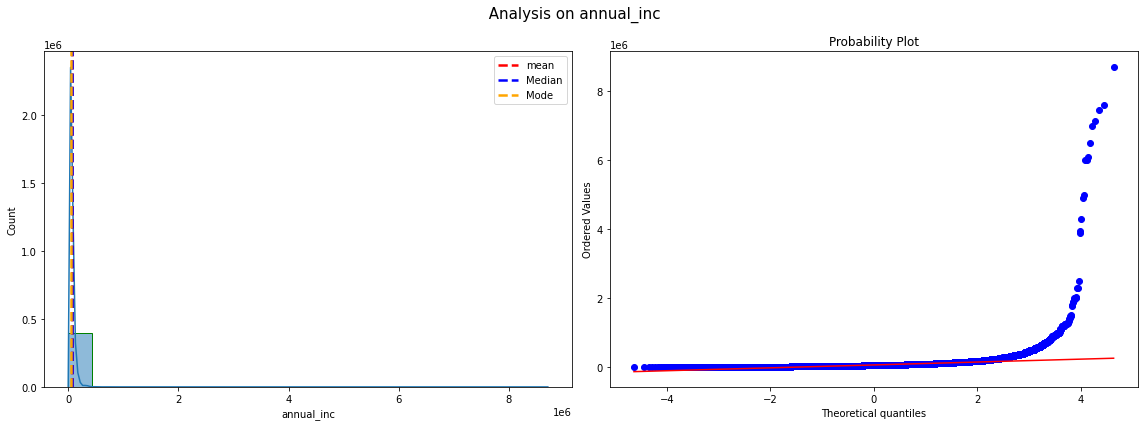

-------------------------------------------------------------------------------------------------------------------


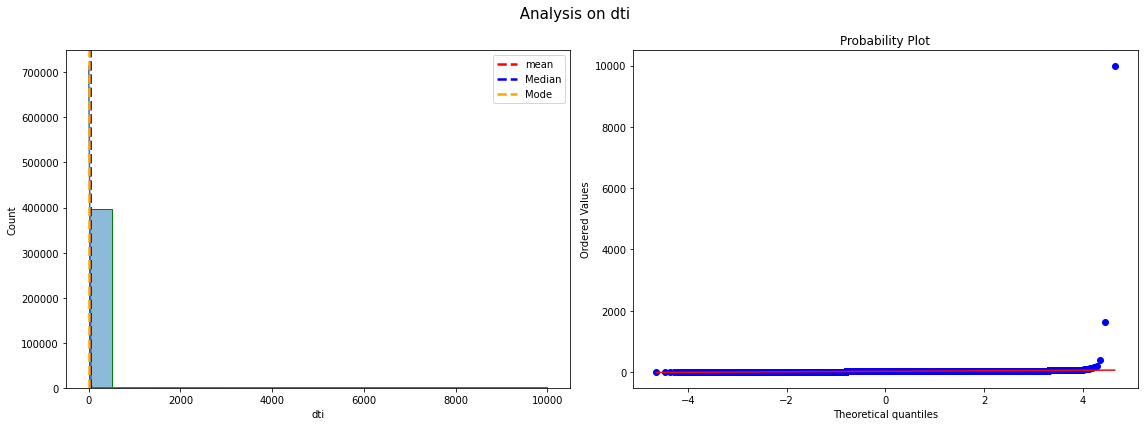

-------------------------------------------------------------------------------------------------------------------


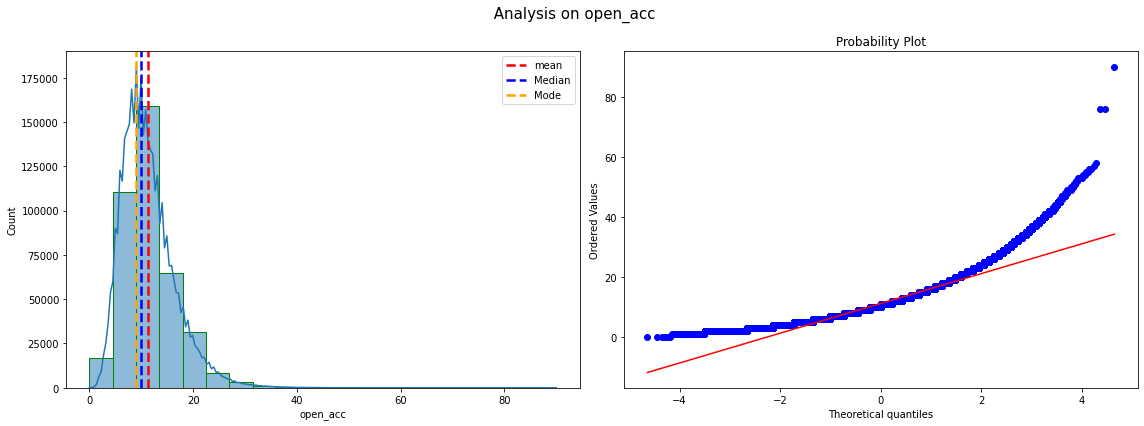

-------------------------------------------------------------------------------------------------------------------


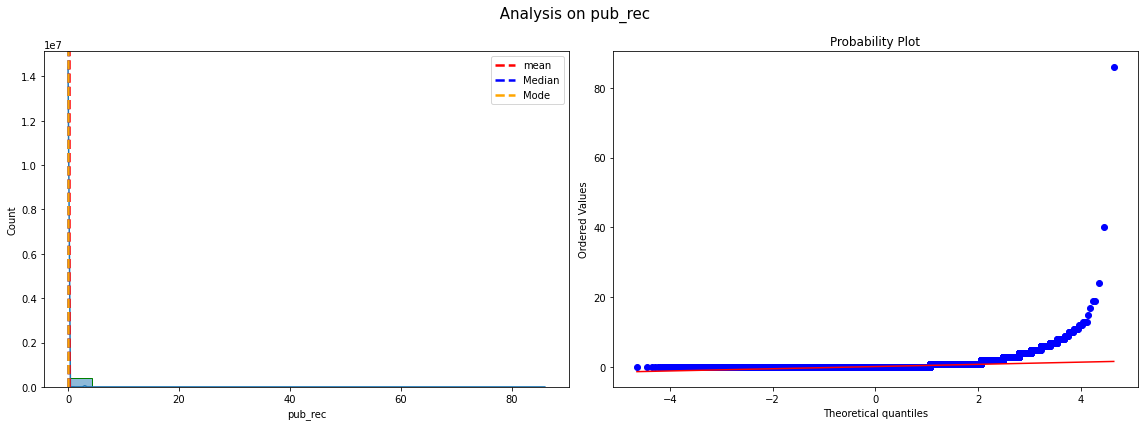

-------------------------------------------------------------------------------------------------------------------


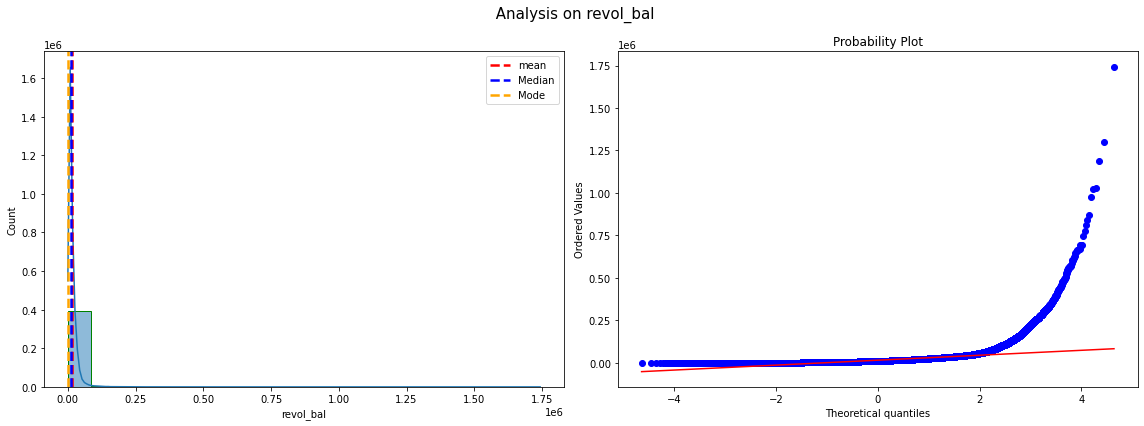

-------------------------------------------------------------------------------------------------------------------


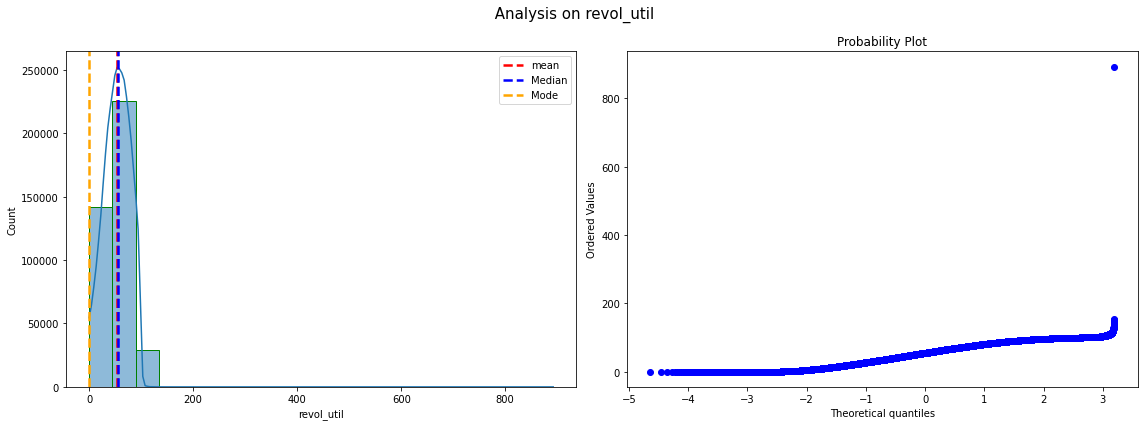

-------------------------------------------------------------------------------------------------------------------


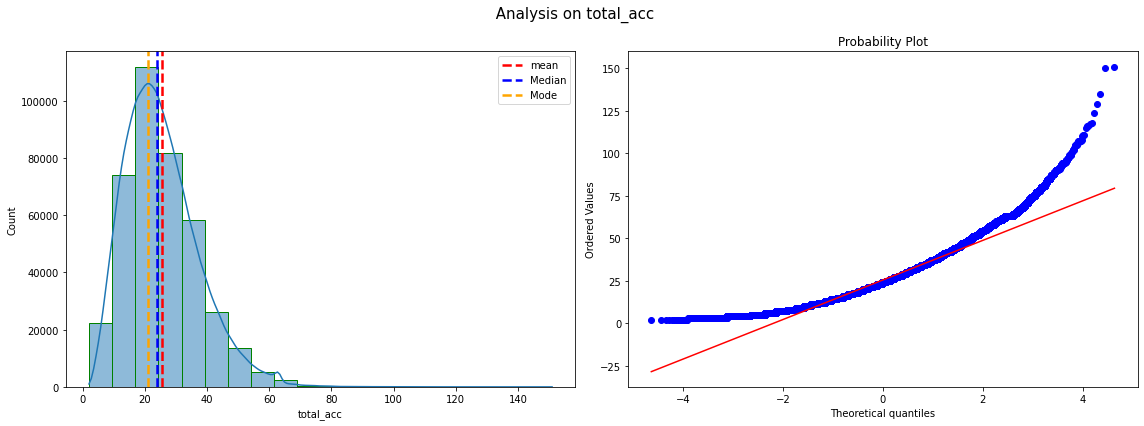

-------------------------------------------------------------------------------------------------------------------


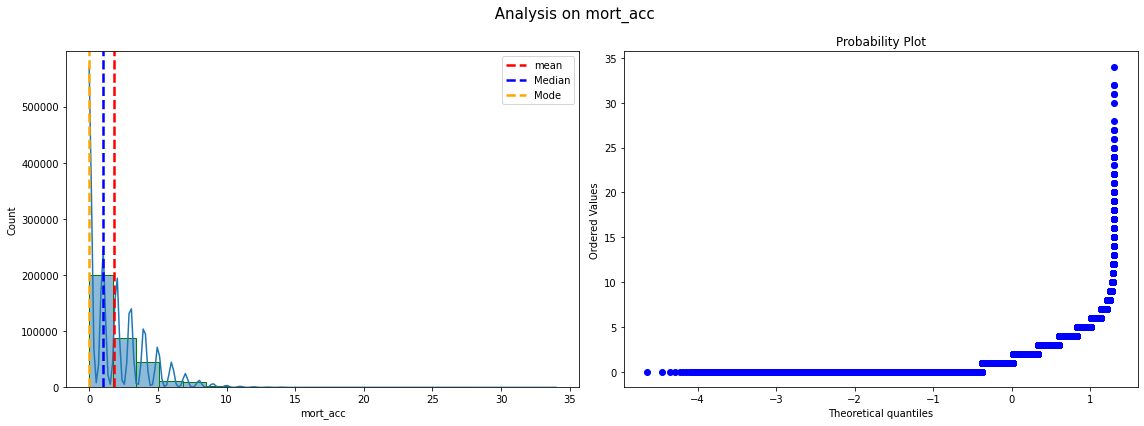

-------------------------------------------------------------------------------------------------------------------


In [21]:
# Univariate analysis for numerical features
num = df.select_dtypes(include='number')
for x in num:
    plotfor_continuousdata(x)
    print("-------------------------------------------------------------------------------------------------------------------")

In [22]:
for x in num:
    print("Statistical information for ", x.upper())
    print(df[x].describe().round(2))
    print("--"*40)
    print("Outlier Analysis for ", x.upper())
    print(outlierAnalysis(x))
    print("__"*60)
    print()

Statistical information for  LOAN_AMNT
count    396030.00
mean      14113.89
std        8357.44
min         500.00
25%        8000.00
50%       12000.00
75%       20000.00
max       40000.00
Name: loan_amnt, dtype: float64
--------------------------------------------------------------------------------
Outlier Analysis for  LOAN_AMNT
For the given sample loan_amnt Analysis is as Follows: 
Q1:  8000.0
Q3:  20000.0
Mean:  14113.89
Median:  12000.0
Mode:  0    10000.0
Name: loan_amnt, dtype: float64
IQR:  12000.0
Maximum loan_amnt Excluding Outlier:  38000.0
Minimum loan_amnt Purchase Excluding Outlier:  -10000.0
None
________________________________________________________________________________________________________________________

Statistical information for  INT_RATE
count    396030.00
mean         13.64
std           4.47
min           5.32
25%          10.49
50%          13.33
75%          16.49
max          30.99
Name: int_rate, dtype: float64
----------------------------------

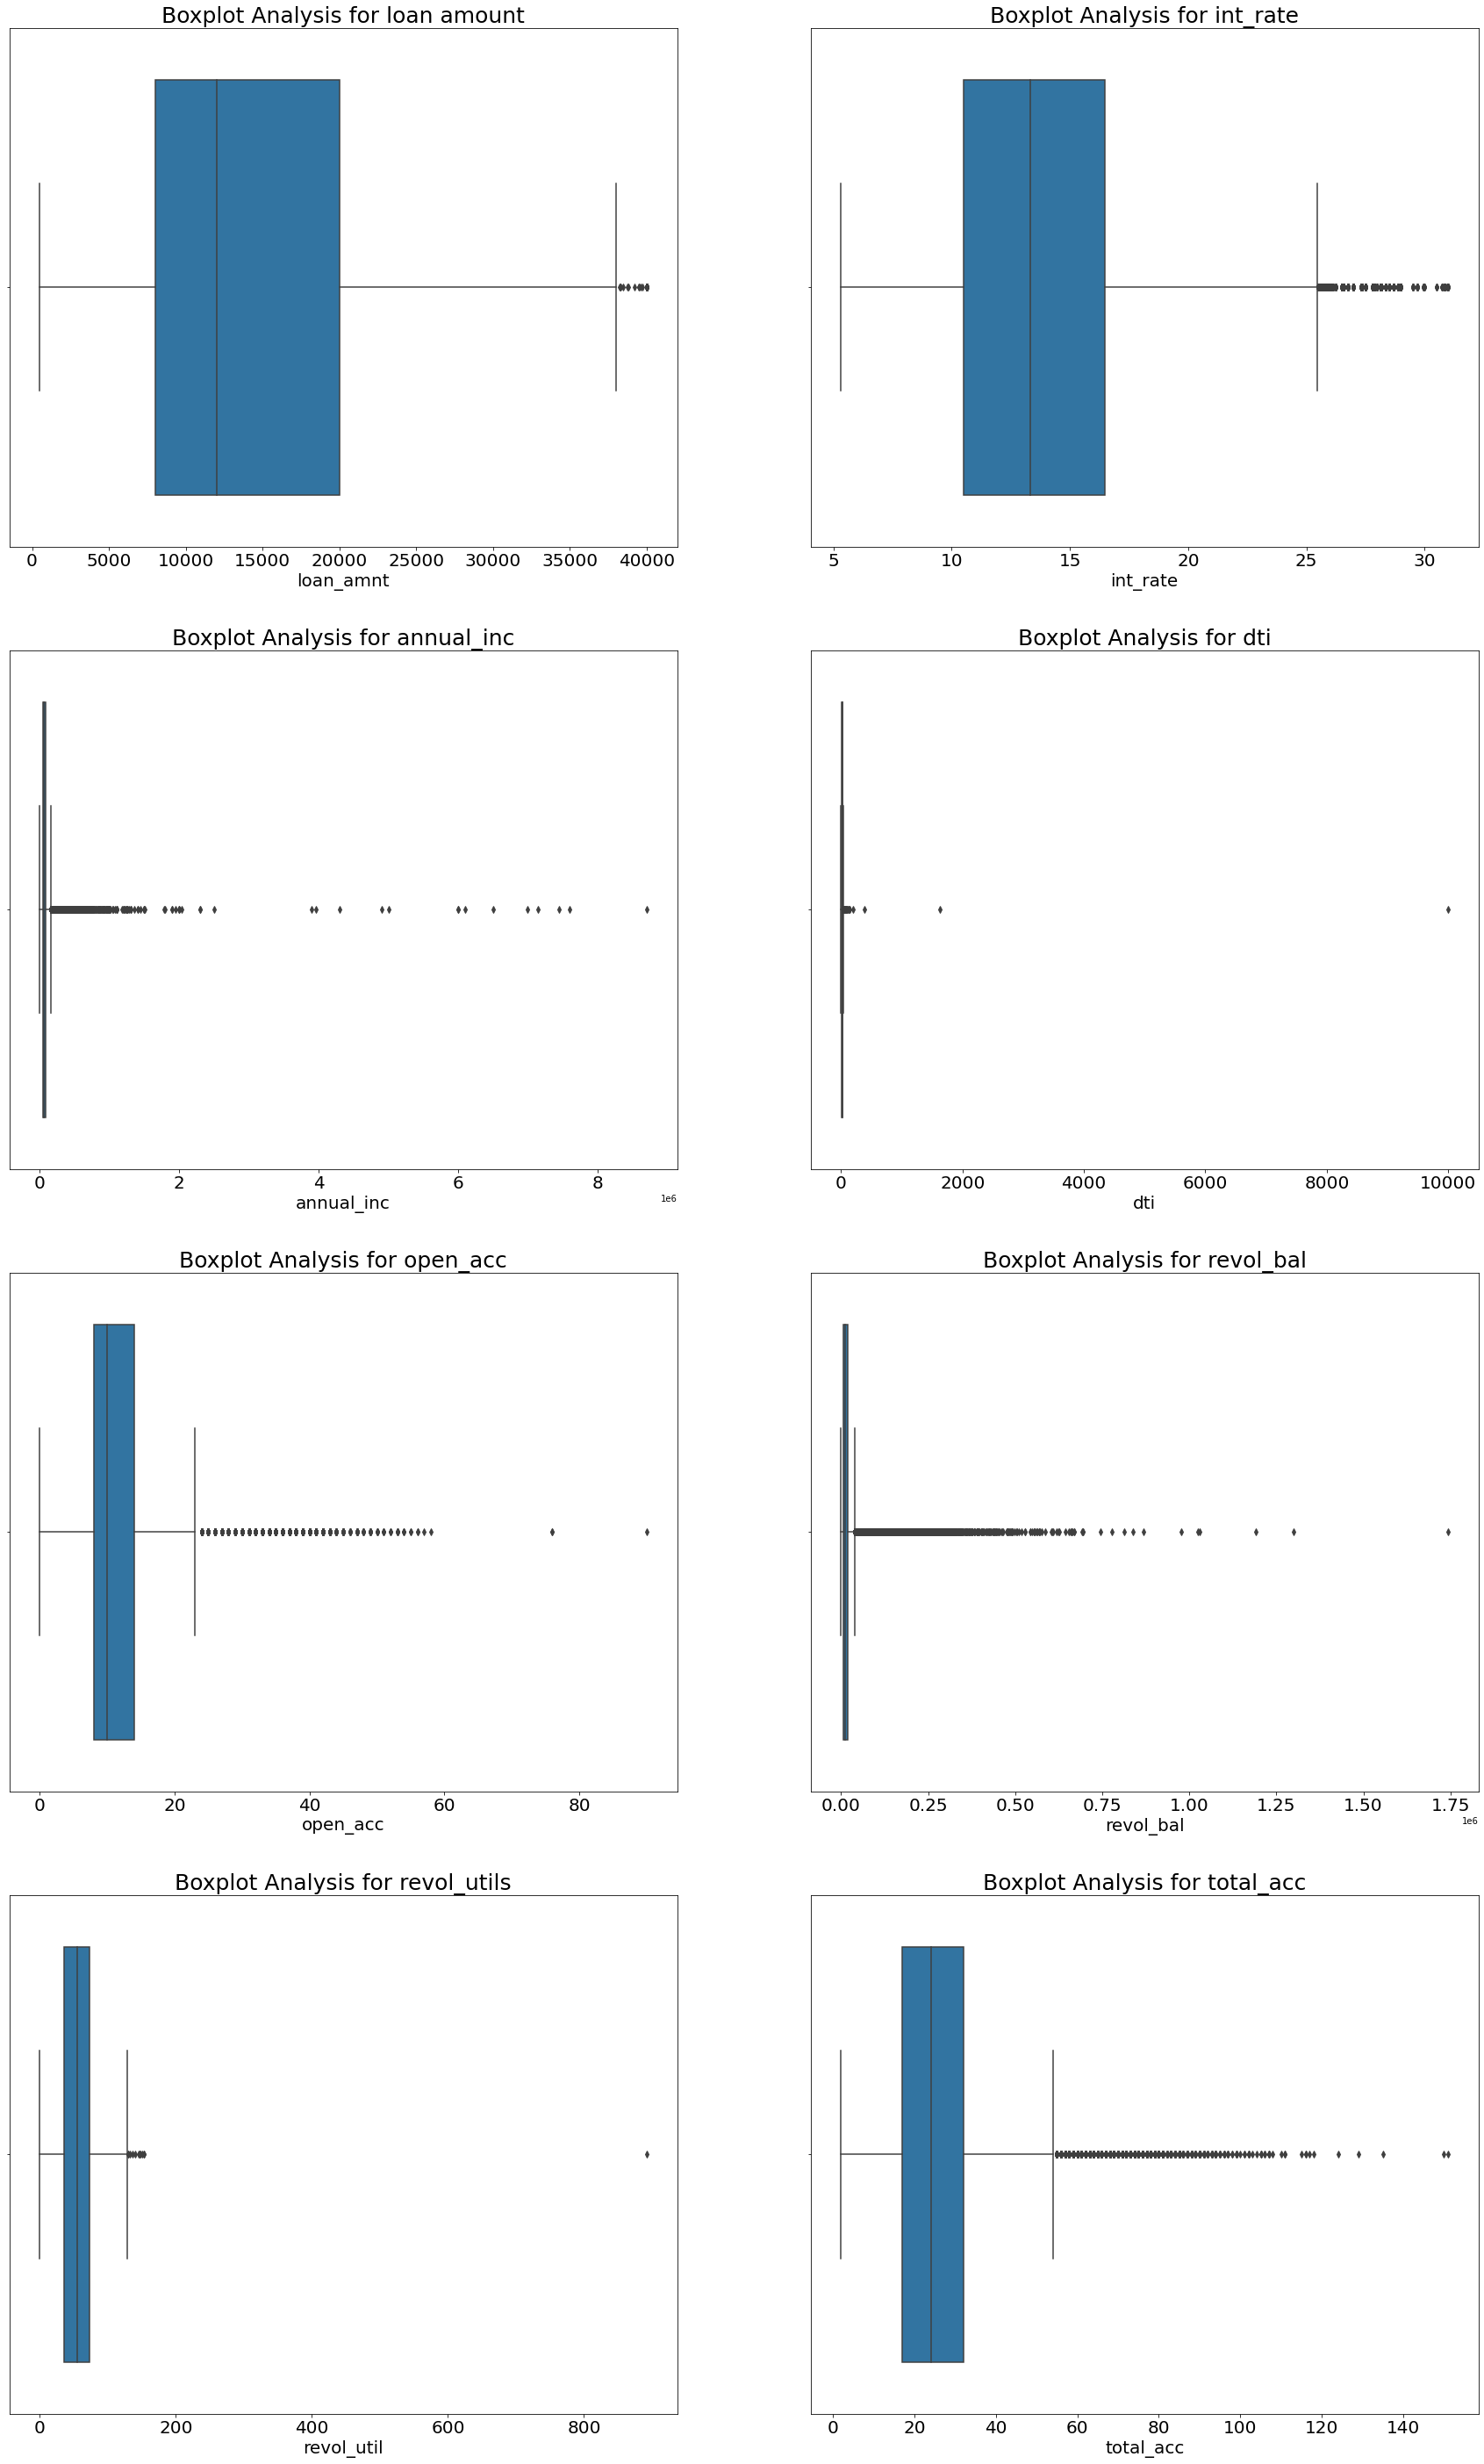

In [23]:
# Boxplot for numerical features
fig, axs = plt.subplots(4, 2, figsize=(30, 50), sharey=False)
graph = sns.boxplot(x = "loan_amnt", data= df,dodge=False, ax=axs[0][0])
title1 = "Boxplot Analysis for loan amount" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('loan_amnt', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "int_rate", data= df, dodge=False, ax=axs[0][1])
title1 = "Boxplot Analysis for int_rate" 
graph.set_xlabel('int_rate', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)
graph.set_title(title1, fontsize = 25)


graph = sns.boxplot(x = "annual_inc", data= df, dodge=False, ax=axs[1][0])
title1 = "Boxplot Analysis for annual_inc" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('annual_inc', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "dti", data= df, dodge=False, ax=axs[1][1])
title1 = "Boxplot Analysis for dti" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('dti', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "open_acc", data= df, dodge=False, ax=axs[2][0])
title1 = "Boxplot Analysis for open_acc" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('open_acc', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "revol_bal", data= df, dodge=False, ax=axs[2][1])
title1 = "Boxplot Analysis for revol_bal" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('revol_bal', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "revol_util", data= df, dodge=False, ax=axs[3][0])
title1 = "Boxplot Analysis for revol_utils" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('revol_util', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "total_acc", data= df, dodge=False, ax=axs[3][1])
title1 = "Boxplot Analysis for total_acc" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('total_acc', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)
plt.show()

We can see most of the numerical data we have is right skewed so, outlier treatment will be must


### **Bivariate Analysis based on Loan Status**

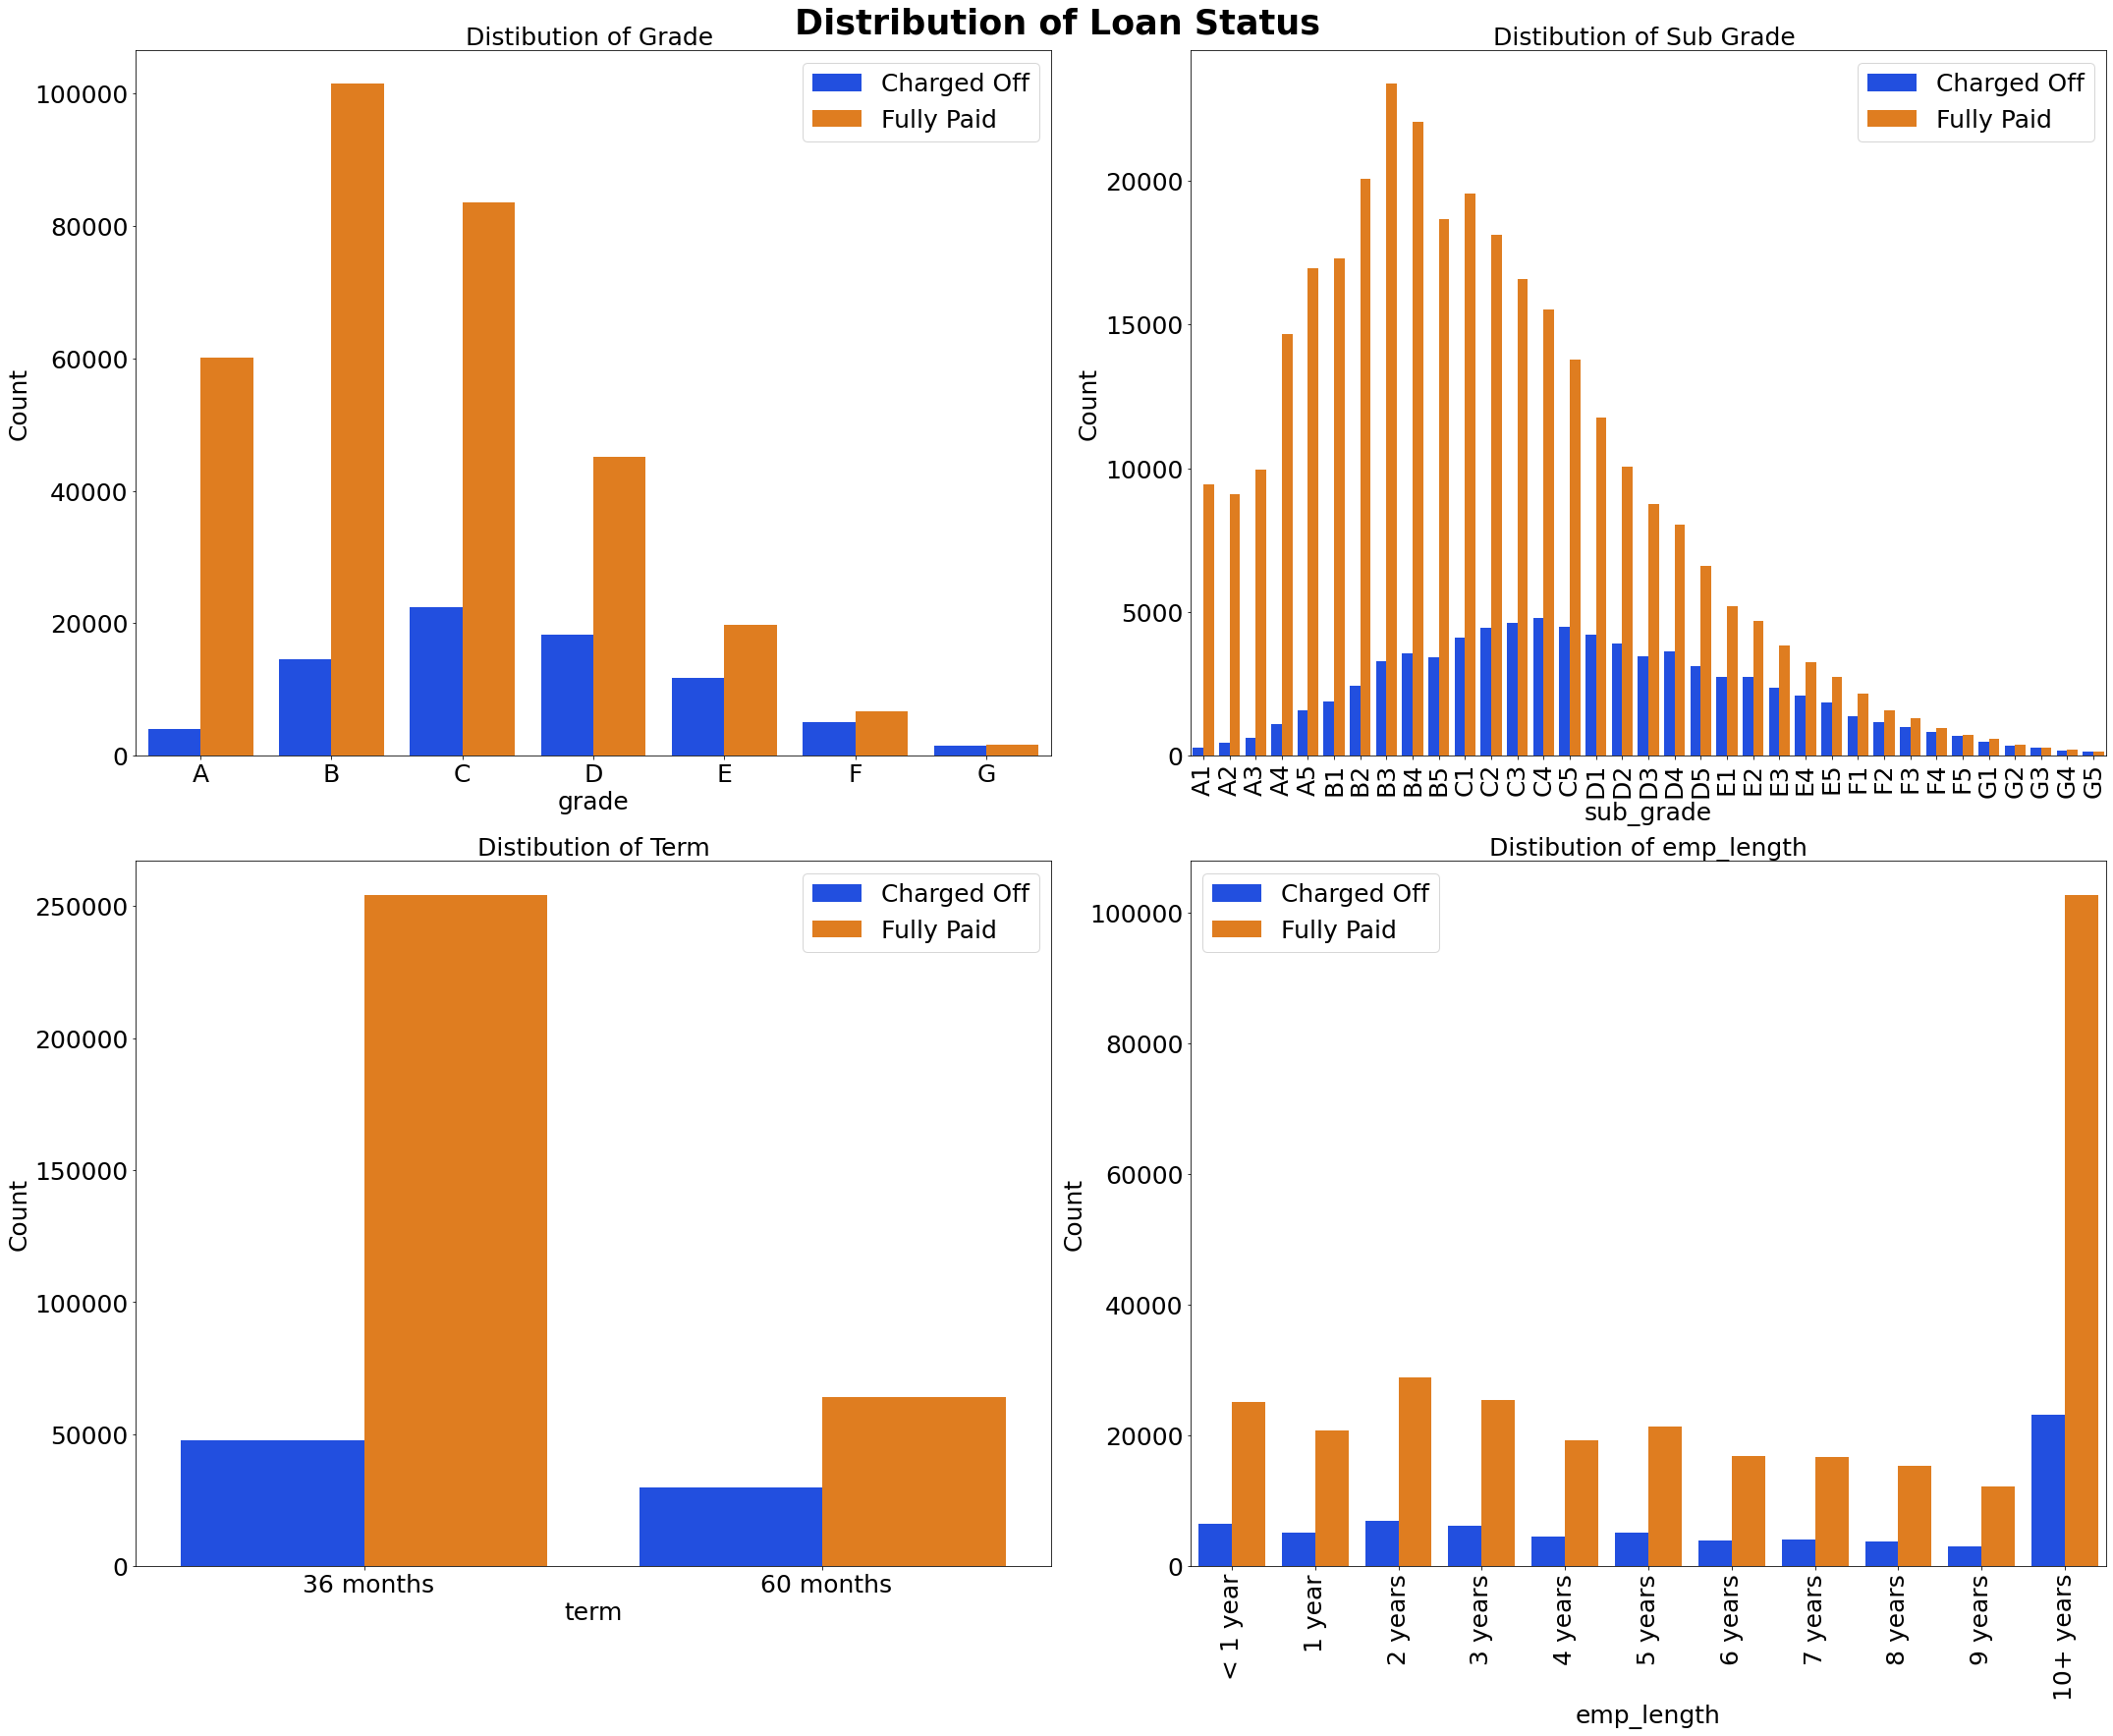

In [24]:
# Bivariate analysis on categorical features
fig, axs = plt.subplots(2, 2, figsize=(30, 25), sharey=False)
fig.suptitle("Distribution of Loan Status" , fontsize=35, fontweight='bold')
grade = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
graph = sns.countplot(x = 'grade', hue= 'loan_status', data= df, ax = axs[0][0],palette='bright', order = grade)
graph.set_title("Distibution of Grade ", fontsize = 25)
graph.set_xlabel('grade', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)

sub_grade = sorted(df.sub_grade.unique().tolist())
graph = sns.countplot(x = 'sub_grade', hue = 'loan_status', data = df, ax = axs[0][1], palette='bright', order = sub_grade)
graph.set_title("Distibution of Sub Grade ", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
graph.set_xlabel('sub_grade', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)

graph = sns.countplot(x = 'term', hue= 'loan_status', data= df, ax = axs[1][0],palette='bright')
graph.set_title(" Distibution of Term ", fontsize = 25)
graph.set_xlabel('term', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)

order = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years',]
graph = sns.countplot(x = 'emp_length', hue = 'loan_status', data = df, ax = axs[1][1], palette='bright', order = order)
graph.set_title(" Distibution of emp_length ", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
graph.set_xlabel('emp_length', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)
plt.tight_layout()
plt.show()

#### **Observations**
> **Emp_length**
* Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
* It makes sense as with less or no experience they do not have source of income to repay loan.
* Rest of the applicants have more or less same chnaces of getting charged off.

Loan status does not appear to vary much with employment length on average, except for a small drop in charge-offs for borrowers with over 10 years of employment.

In [25]:
table = pd.crosstab(df["grade"],df["loan_status"],normalize='index')
print('contingency_table :\n',table)

contingency_table :
 loan_status  Charged Off  Fully Paid
grade                               
A               0.062879    0.937121
B               0.125730    0.874270
C               0.211809    0.788191
D               0.288678    0.711322
E               0.373634    0.626366
F               0.427880    0.572120
G               0.478389    0.521611


* Out of total customers who belongs to A grade around 94 percent fully paid thier loans. 
* So we can say that people who belongs to A grade have high chances of paying thier loans.
* Grade "A" has very less chances of charged off.
* Grade "F" and "G" have very high chances of charged off.
* Chances of charged off is increasing with grade moving from "A" towards "G"

There is higher probability of charge-off as the grade worsens.

In [26]:
table = pd.crosstab(df["sub_grade"],df["loan_status"],normalize='index')
print('contingency_table :\n',table)

contingency_table :
 loan_status  Charged Off  Fully Paid
sub_grade                           
A1              0.028677    0.971323
A2              0.048186    0.951814
A3              0.058056    0.941944
A4              0.070239    0.929761
A5              0.084908    0.915092
B1              0.098582    0.901418
B2              0.108513    0.891487
B3              0.123354    0.876646
B4              0.138393    0.861607
B5              0.155037    0.844963
C1              0.173696    0.826304
C2              0.197520    0.802480
C3              0.218416    0.781584
C4              0.235355    0.764645
C5              0.245067    0.754933
D1              0.263803    0.736197
D2              0.280338    0.719662
D3              0.284218    0.715782
D4              0.311315    0.688685
D5              0.320103    0.679897
E1              0.344070    0.655930
E2              0.367380    0.632620
E3              0.380377    0.619623
E4              0.393024    0.606976
E5              0

There's a clear trend of higher probability of charge-off as the subgrade worsens.

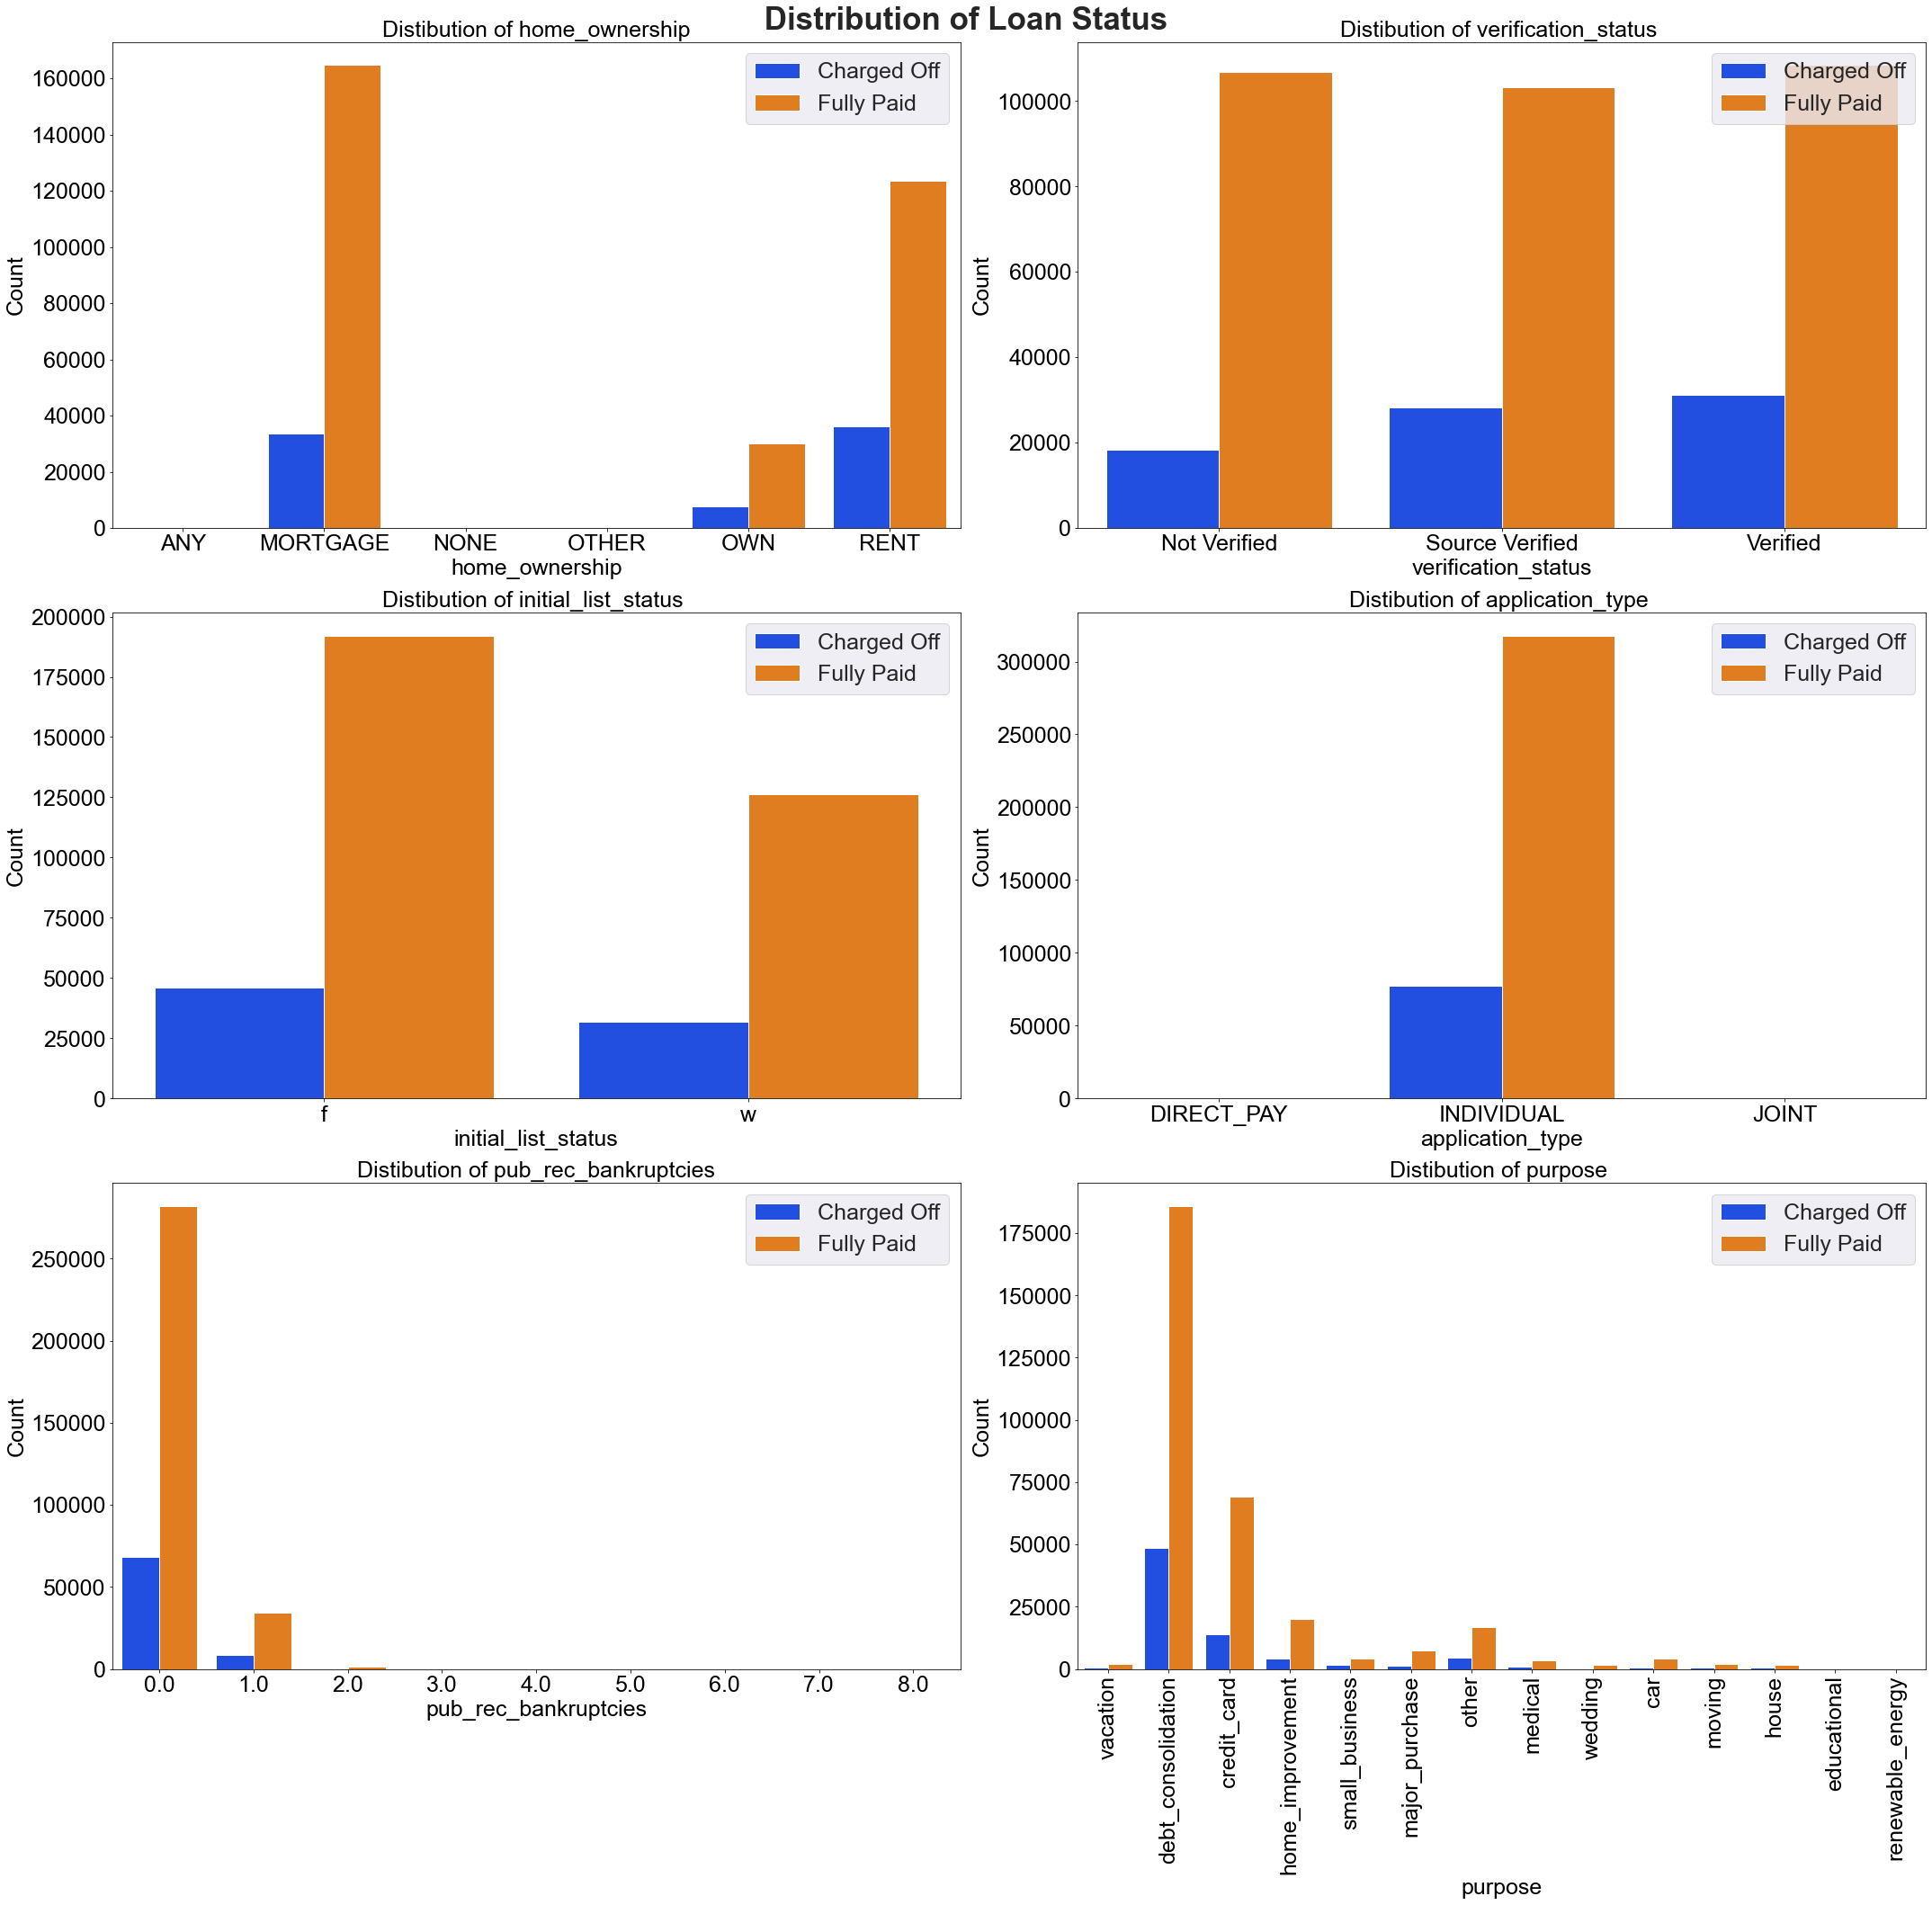

In [27]:
fig, axs = plt.subplots(3, 2, figsize=(30, 30), sharey=False)
sns.set()
fig.suptitle(" Distribution of Loan Status " , fontsize=35, fontweight='bold')
graph = sns.countplot(x = 'home_ownership', hue= 'loan_status', data= df, ax = axs[0][0],palette='bright')
graph.set_title(" Distibution of home_ownership ", fontsize = 25)
graph.set_xlabel('home_ownership', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)


graph = sns.countplot(x = 'verification_status', hue = 'loan_status', data = df, ax = axs[0][1], palette='bright')
graph.set_title("Distibution of verification_status ", fontsize = 25)
graph.set_xlabel('verification_status', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)

graph = sns.countplot(x = 'initial_list_status', hue= 'loan_status', data= df, ax = axs[1][0],palette='bright')
graph.set_title("Distibution of initial_list_status ", fontsize = 25)
graph.set_xlabel('initial_list_status', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)

graph = sns.countplot(x = 'application_type', hue = 'loan_status', data = df, ax = axs[1][1], palette='bright')
graph.set_title("Distibution of application_type ", fontsize = 25)
graph.set_xlabel('application_type', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)

graph = sns.countplot(x = 'pub_rec_bankruptcies', hue = 'loan_status', data = df, ax = axs[2][0], palette='bright')
graph.set_title("Distibution of pub_rec_bankruptcies", fontsize = 25)
graph.set_xlabel('pub_rec_bankruptcies', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)

graph = sns.countplot(x = 'purpose', hue = 'loan_status', data = df, ax = axs[2][1], palette='bright')
graph.set_title("Distibution of purpose ", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
graph.set_xlabel('purpose', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)
plt.tight_layout()
plt.show()

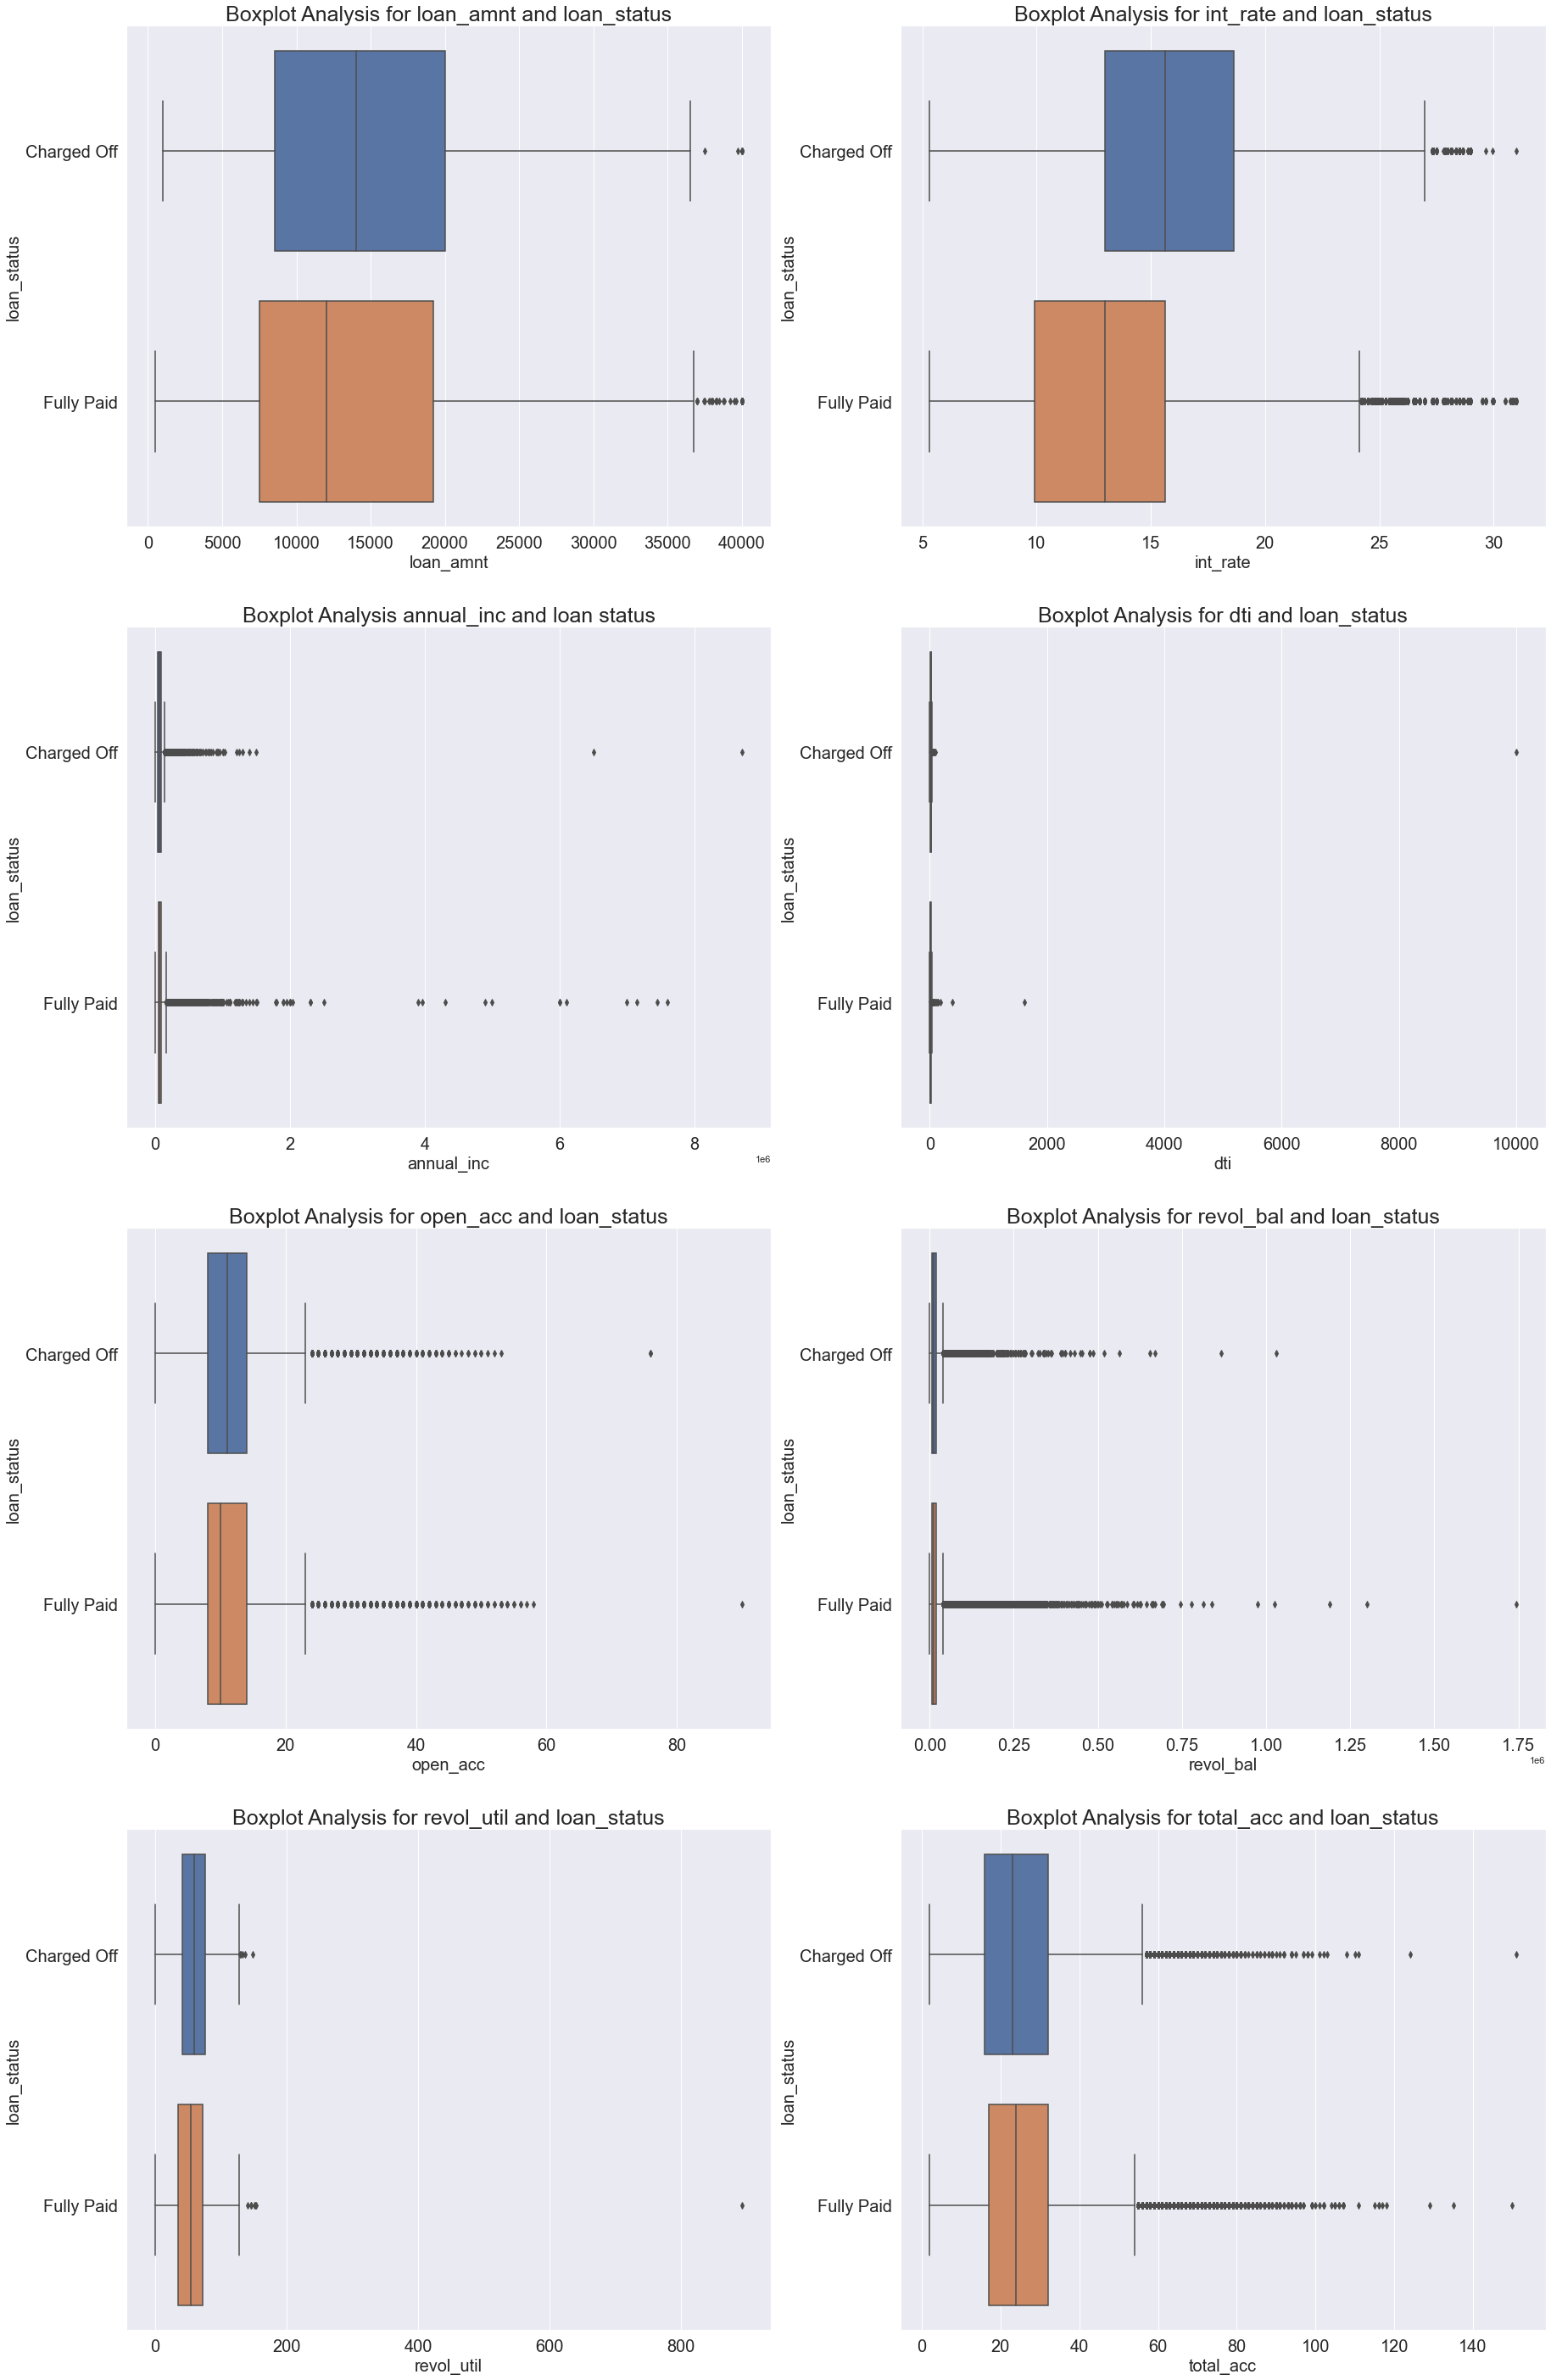

In [28]:
fig, axs = plt.subplots(4, 2, figsize=(30, 50), sharey=False)
graph = sns.boxplot(x = "loan_amnt", data= df, y = "loan_status",dodge=False, ax=axs[0][0])
title1 = "Boxplot Analysis for loan_amnt and loan_status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('loan_amnt', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "int_rate", data= df, y = "loan_status", dodge=False, ax=axs[0][1])
title1 = "Boxplot Analysis for int_rate and loan_status" 
graph.set_xlabel('int_rate', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)
graph.set_title(title1, fontsize = 25)


graph = sns.boxplot(x = "annual_inc", data= df, y = "loan_status", dodge=False, ax=axs[1][0])
title1 = "Boxplot Analysis annual_inc and loan status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('annual_inc', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "dti", data= df, y = "loan_status", dodge=False, ax=axs[1][1])
title1 = "Boxplot Analysis for dti and loan_status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('dti', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "open_acc", data= df, y = "loan_status", dodge=False, ax=axs[2][0])
title1 = "Boxplot Analysis for open_acc and loan_status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('open_acc', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "revol_bal", data= df, y = "loan_status", dodge=False, ax=axs[2][1])
title1 = "Boxplot Analysis for revol_bal and loan_status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('revol_bal', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "revol_util", data= df, y = "loan_status", dodge=False, ax=axs[3][0])
title1 = "Boxplot Analysis for revol_util and loan_status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('revol_util', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "total_acc", data= df, y = "loan_status", dodge=False, ax=axs[3][1])
title1 = "Boxplot Analysis for total_acc and loan_status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('total_acc', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)
plt.show()

**Emp_title**

In [29]:
# categorical
df.groupby("loan_status")["emp_title"].describe().round(2)

,count,unique,top,freq
loan_status,,,,
Charged Off,71730,40057,Manager,929
Fully Paid,301373,145235,Teacher,3532


In [30]:
df.emp_title.value_counts(normalize=True)[:10]

Teacher             0.011764
Manager             0.011391
Registered Nurse    0.004974
RN                  0.004948
Supervisor          0.004905
Sales               0.004390
Project Manager     0.004034
Owner               0.003779
Driver              0.003589
Office Manager      0.003265
Name: emp_title, dtype: float64

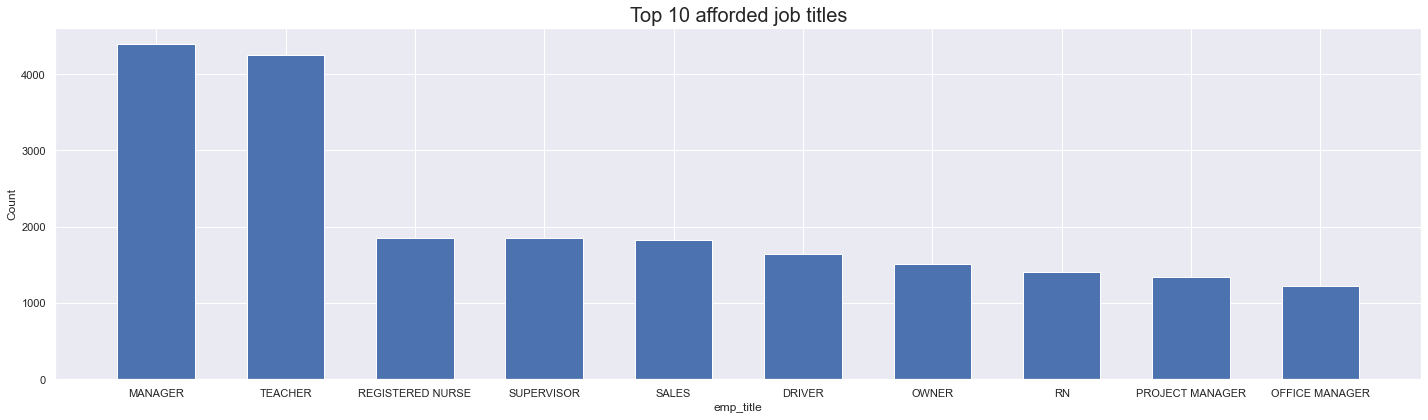

In [31]:
fig = plt.figure(figsize = (20,6))
p = plt.bar(df["emp_title"].str.upper().value_counts()[:10].index,df.emp_title.value_counts()[:10],width=0.6)
plt.title("Top 10 afforded job titles", fontsize = 20)
plt.ylabel("Count")
plt.xlabel("emp_title")
plt.tight_layout()
plt.show()

The top 2 afforded job titles are Manager and Teacher

**Title**

In [32]:
df.title = df.title.str.lower()
(df.title.value_counts(normalize=True)*100)[:10]

debt consolidation           42.637246
credit card refinancing      13.133219
home improvement              4.341386
other                         3.295416
consolidation                 1.416017
major purchase                1.267643
debt consolidation loan       0.891002
business                      0.765202
medical expenses              0.715237
credit card consolidation     0.669076
Name: title, dtype: float64

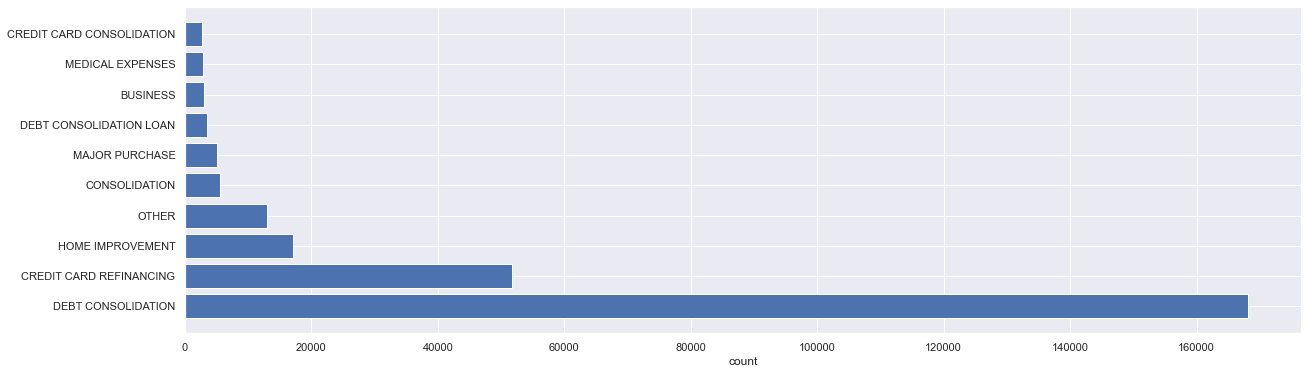

In [33]:
fig = plt.figure(figsize = (20,6))
p = plt.barh(df["title"].str.upper().value_counts()[:10].index,df.title.value_counts()[:10])
plt.xlabel("count")
plt.show()

Around 42 % peple put their title as debt consolidation, but thier is non uniformaty with these feature, so we will drop these column in further analysis

# Feature Engineering

In [34]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

**Home_ownership**

In [35]:
df.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [36]:
df.loc[(df.home_ownership == "ANY") | (df.home_ownership == "NONE"),"home_ownership"] ="OTHER"
df.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
ANY              0
NONE             0
Name: home_ownership, dtype: int64

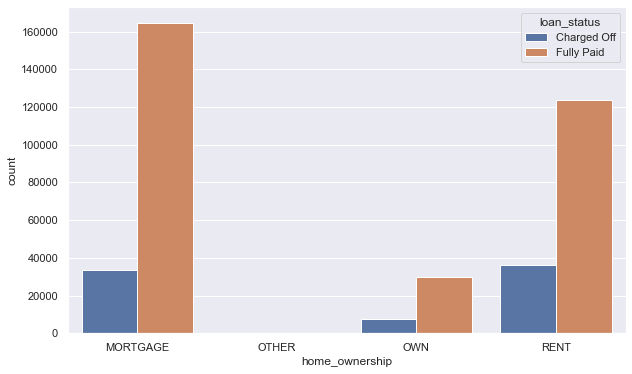

In [37]:
fig = plt.figure(figsize = (10,6))
val_list = list(sorted(df.home_ownership.unique()))
sns.countplot(x="home_ownership",data=df,hue="loan_status",order = val_list)
plt.show()

* There appear to be large differences in charge-off rates by home ownership status. 
* Renters and homeowners have a higher probability of charge-off.
* Individuals who pay off their loans are more likely to have several mortgage accounts.

**Purpose**

In [38]:
df.purpose.replace(['moving', 'vacation','house','wedding','renewable_energy','educational'],'other', inplace = True)

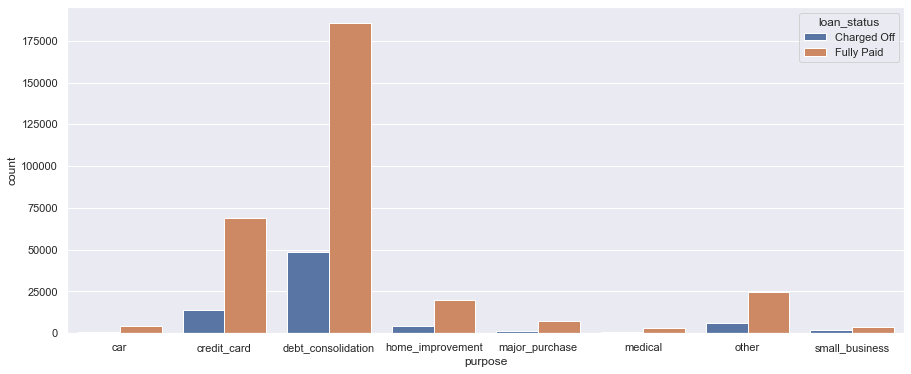

In [39]:
fig = plt.figure(figsize = (15,6))
val_list = list(sorted(df.purpose.unique()))
sns.countplot(x="purpose",data=df,hue="loan_status",order = val_list)
plt.show()

**Mort_acc**

In [40]:
df.mort_acc.value_counts()[:5]

0.0    139777
1.0     60416
2.0     49948
3.0     38049
4.0     27887
5.0     18194
Name: mort_acc, dtype: int64

In [41]:
# Replave NaN values by mean 
df['mort_acc'].fillna(np.round(df.mort_acc.mean()), inplace=True)

In [42]:
df['mort_acc'] = np.where((df.mort_acc >= 1),1,df.mort_acc)

<AxesSubplot:xlabel='mort_acc', ylabel='count'>

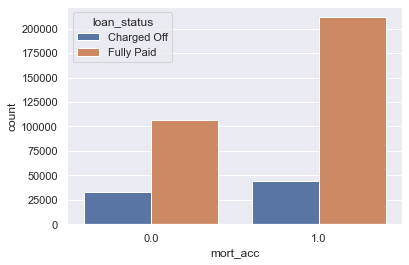

In [43]:
sns.countplot(x="mort_acc",data=df,hue="loan_status")

**Public record bankruptcies**

In [44]:
# numerical
df.groupby("loan_status")["pub_rec_bankruptcies"].describe().round(2)

,count,unique,top,freq
loan_status,,,,
Charged Off,77586.0,9.0,0.0,68321.0
Fully Paid,317909.0,9.0,0.0,282059.0


In [45]:
df['pub_rec'] = np.where((df.pub_rec >= 1),1,df.pub_rec)
def pub_rec_bankruptcies(val):
    if val == 0.0:
        return 0
    elif val >= 1.0:
        return 1
    else:
        return val
df.pub_rec_bankruptcies = df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

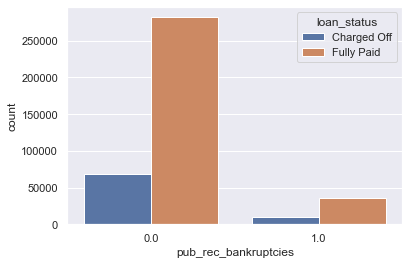

In [46]:
sns.countplot(hue='loan_status', x='pub_rec_bankruptcies', data = df)

* Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
* pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
* This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

**Emp_length**

In [47]:
df.emp_length.unique()

['10+ years', '4 years', '< 1 year', '6 years', '9 years', ..., '8 years', '7 years', '5 years', '1 year', NaN]
Length: 12
Categories (11, object): ['1 year', '10+ years', '2 years', '3 years', ..., '7 years', '8 years', '9 years', '< 1 year']

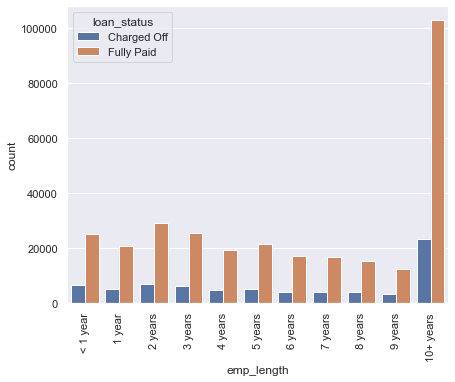

In [48]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
 '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=df, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [49]:
df['emp_length'] = df['emp_length'].str.rstrip(" years")
def emp_length(val):
    if val == "10+":
        return 10
    elif val == "< 1":
        return 0
    elif val in ["1","2", "3", "4", "5", "6", "7", "8", "9"]:
        return int(val)
    else:
        return val
    
df['emp_length'] = df.emp_length.apply(emp_length)

In [50]:
df['emp_length'].fillna(6, inplace = True)

In [51]:
# Dropping the remaining null values from features in dataset
df.dropna(inplace=True)

In [52]:
df.isnull().sum()/len(df)*100

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
title                   0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
dtype: float64

**Address_state**

In [53]:
df["address_state"]= df["address"].apply(lambda x: x[-8:-5])
df.address_state
df.groupby('address_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values(ascending=False)

address_state
WY     0.202366
WV     0.200490
PA     0.199220
MT     0.198135
WA     0.198020
NV     0.197516
MS     0.197497
ID     0.197280
AP     0.196789
KS     0.196749
NC     0.196081
KY     0.196029
NE     0.195478
GA     0.194865
SC     0.194827
IL     0.194530
AR     0.194517
WI     0.194432
UT     0.193698
AA     0.193499
AZ     0.193449
MO     0.193374
VA     0.192582
SD     0.192522
MD     0.192480
TN     0.192379
AK     0.192249
NJ     0.192128
MA     0.191875
DC     0.191463
ME     0.191190
RI     0.191149
IA     0.190881
AE     0.190783
LA     0.190728
TX     0.190433
AL     0.190219
CT     0.190180
NM     0.190179
ND     0.190164
MI     0.190092
OK     0.189873
HI     0.189642
CO     0.189588
NH     0.189485
FL     0.188805
OH     0.188143
DE     0.187597
VT     0.187319
CA     0.186202
OR     0.186202
IN     0.184945
NY     0.181167
MN     0.178897
Name: loan_status, dtype: float64

The charge-off rate ranges from 18% in Minnesota to 20.81% in Wyoming.

**Zip Code**

In [65]:
df['zip_code'] = df.address.apply(lambda x: x[-5:])
df['zip_code'].value_counts(normalize=True)

70466    0.143828
30723    0.142728
22690    0.142620
48052    0.141296
00813    0.116215
29597    0.115427
05113    0.115187
11650    0.027740
93700    0.027692
86630    0.027268
Name: zip_code, dtype: float64

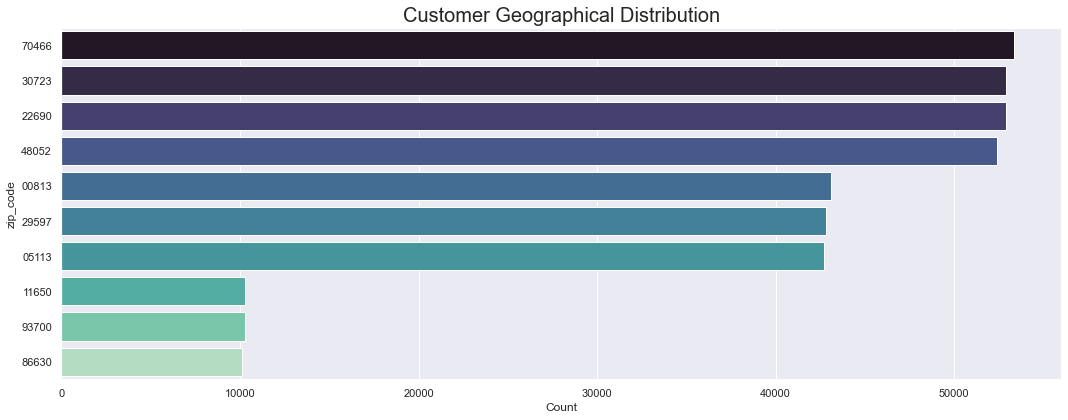

In [66]:
fig, ax = plt.subplots(figsize=(15, 6))
graph = sns.barplot( x = df.zip_code.value_counts(),y = df['zip_code'].value_counts().index, palette='mako')
graph.set_title("Customer Geographical Distribution", fontsize = 20)
plt.xlabel("Count")
plt.ylabel("zip_code")
plt.tight_layout()
plt.show()

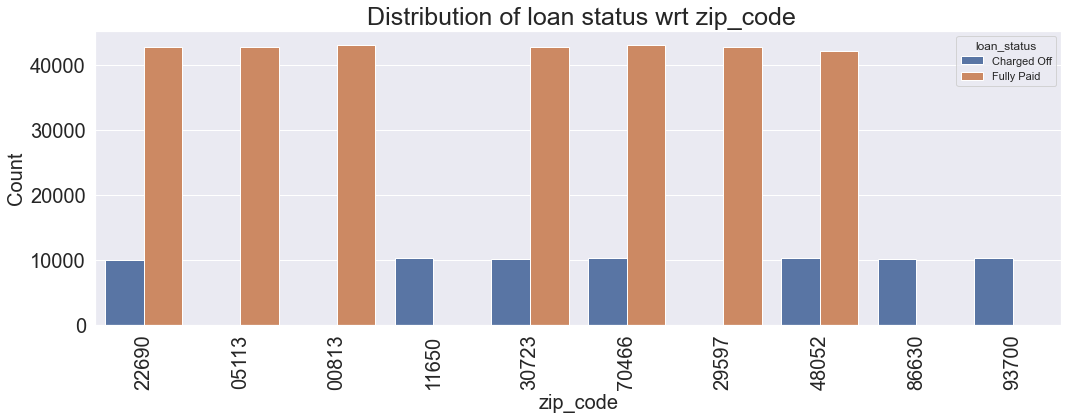

In [68]:
fig, ax = plt.subplots(figsize=(15, 6))
graph = sns.countplot(x = 'zip_code', hue = 'loan_status', data = df)
graph.set_title(" Distribution of loan status wrt zip_code", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
graph.set_xlabel('zip_code', fontsize=20);
graph.set_ylabel('Count', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.show()

We could see location with zip code 11650, 86630, 93700 are having high charged off rates and no people from these areas fully paid thier loans. People from location with zip code 05113, 00813 and 29597 fully paid their loans.

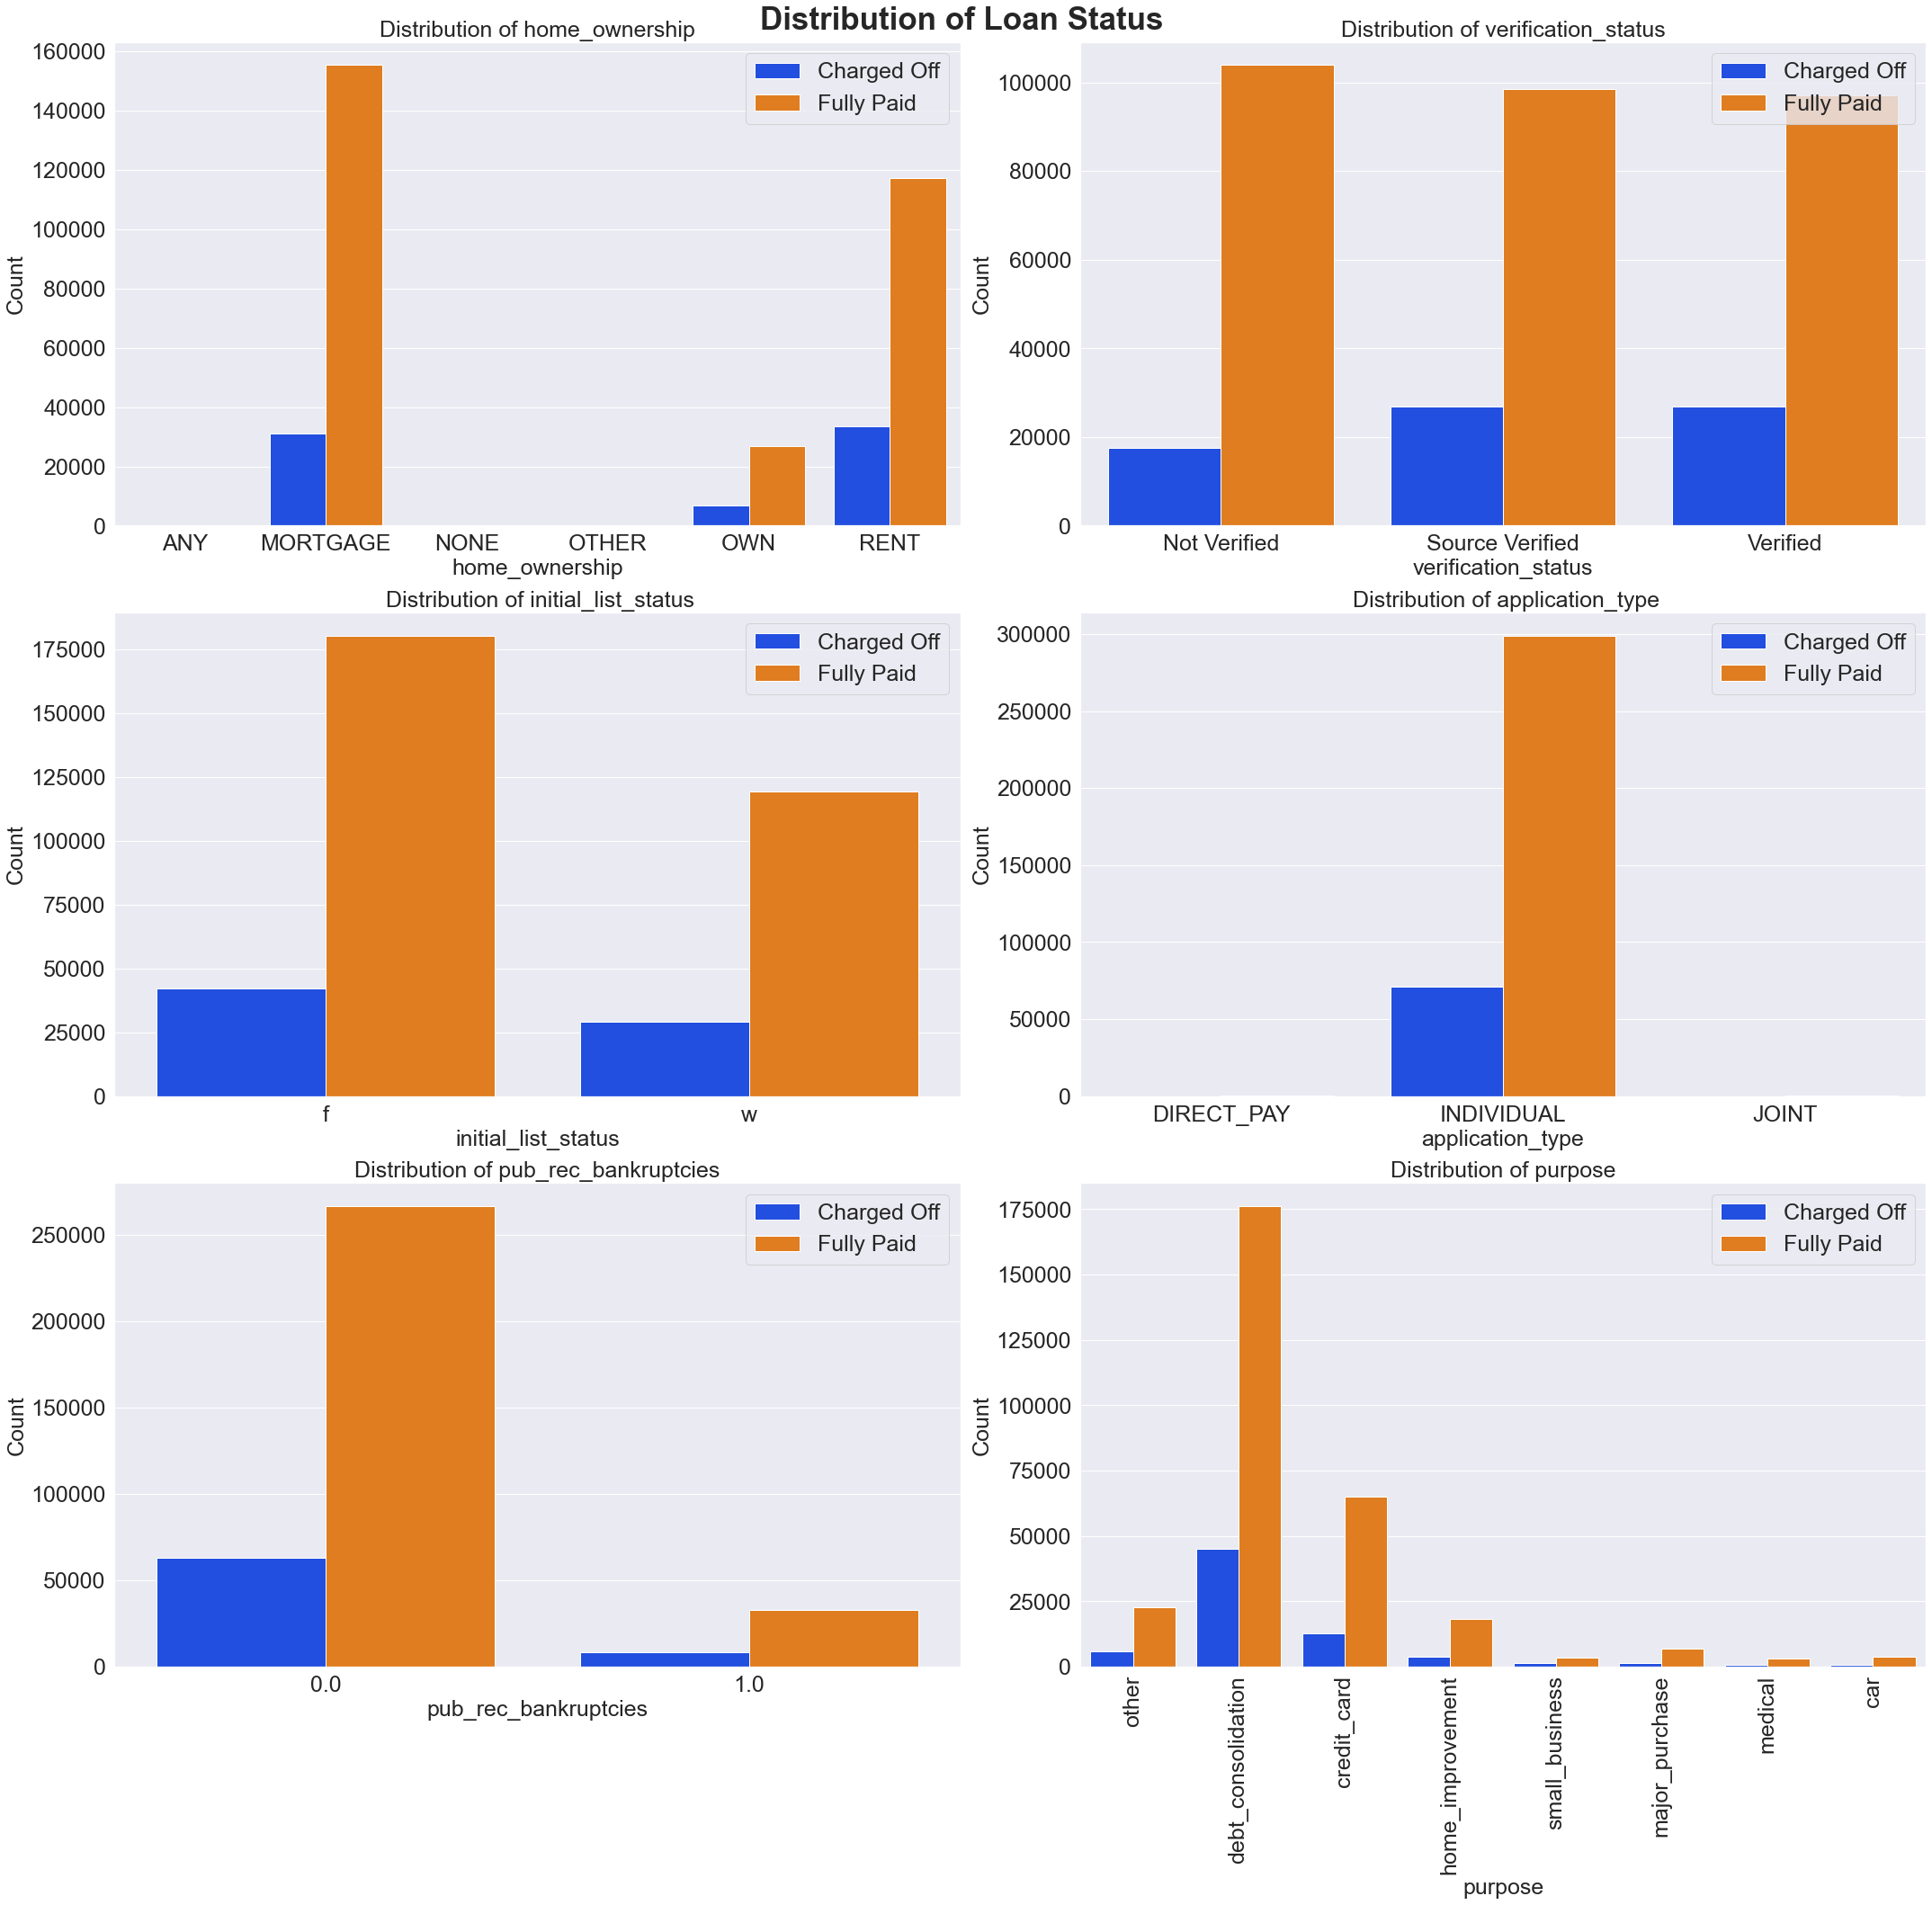

In [69]:
fig, axs = plt.subplots(3, 2, figsize=(30, 30), sharey=False)
sns.set()
fig.suptitle("Distribution of Loan Status " , fontsize=35, fontweight='bold')
graph = sns.countplot(x = 'home_ownership', hue= 'loan_status', data= df, ax = axs[0][0],palette='bright')
graph.set_title(" Distribution of home_ownership ", fontsize = 25)
graph.set_xlabel('home_ownership', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)


sub_grade = sorted(df.sub_grade.unique().tolist())
graph = sns.countplot(x = 'verification_status', hue = 'loan_status', data = df, ax = axs[0][1], palette='bright')
graph.set_title(" Distribution of verification_status ", fontsize = 25)
graph.set_xlabel('verification_status', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)

graph = sns.countplot(x = 'initial_list_status', hue= 'loan_status', data= df, ax = axs[1][0],palette='bright')
graph.set_title(" Distribution of initial_list_status", fontsize = 25)
graph.set_xlabel('initial_list_status', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)

graph = sns.countplot(x = 'application_type', hue = 'loan_status', data = df, ax = axs[1][1], palette='bright')
graph.set_title(" Distribution of application_type", fontsize = 25)
graph.set_xlabel('application_type', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)

graph = sns.countplot(x = 'pub_rec_bankruptcies', hue = 'loan_status', data = df, ax = axs[2][0], palette='bright')
graph.set_title(" Distribution of pub_rec_bankruptcies ", fontsize = 25)
graph.set_xlabel('pub_rec_bankruptcies', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)

graph = sns.countplot(x = 'purpose', hue = 'loan_status', data = df, ax = axs[2][1], palette='bright')
graph.set_title(" Distribution of purpose ", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
graph.set_xlabel('purpose', fontsize=25);
graph.set_ylabel('Count', fontsize=25);
graph.tick_params(axis='both', which='major', labelsize=25)
graph.legend(fontsize = 25)
plt.tight_layout()
plt.show()

**Multivariate analysis**

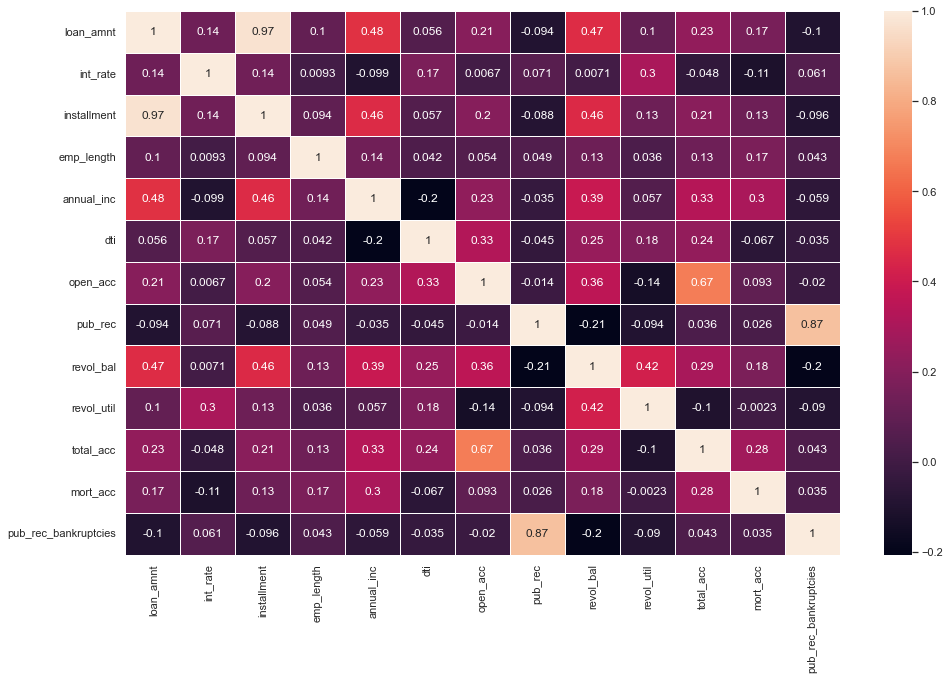

In [70]:
# Correlation of numerical values in dataset
corr = df.corr(method = "spearman")

# Heatmap for the correlation of numerical values in dataset
plt.figure(figsize=(16,10))
plt.show(sns.heatmap(corr,linewidths=.5, annot=True))

In [71]:
toCategory.extend(["pub_rec","mort_acc", "pub_rec_bankruptcies"])
for x in toCategory:
    df[x] = df[x].astype('category')

In [72]:
# install ment and loan amnt is highly correlated...Hence we drop installment feature from further analysis.
df.drop(columns=['installment'], axis=1, inplace=True)
# num_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc','revol_bal', 'revol_util', 'total_acc']

In [73]:
numerical_data = df.select_dtypes(include='number')
num_cols = numerical_data.columns
len(num_cols)

8

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370797 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             370797 non-null  float64       
 1   term                  370797 non-null  category      
 2   int_rate              370797 non-null  float64       
 3   grade                 370797 non-null  category      
 4   sub_grade             370797 non-null  category      
 5   emp_title             370797 non-null  object        
 6   emp_length            370797 non-null  category      
 7   home_ownership        370797 non-null  category      
 8   annual_inc            370797 non-null  float64       
 9   verification_status   370797 non-null  category      
 10  issue_d               370797 non-null  datetime64[ns]
 11  loan_status           370797 non-null  category      
 12  purpose               370797 non-null  object        
 13 

# Outlier Treatment

In [75]:
df.groupby(by='loan_status').mean().round(2)

,loan_amnt,int_rate,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc
loan_status,,,,,,,,
Charged Off,15381.37,15.93,68754.92,19.52,11.73,15527.32,58.03,25.15
Fully Paid,13978.09,13.09,76706.05,16.82,11.31,16048.09,53.02,25.60


In [76]:
df.groupby(by='loan_status').std().round(2)

,loan_amnt,int_rate,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc
loan_status,,,,,,,,
Charged Off,8495.83,4.38,59034.63,8.34,5.31,17890.44,23.44,11.93
Fully Paid,8301.76,4.32,62688.24,7.96,5.10,21115.63,24.51,11.88


In [77]:
upperLimit = df.groupby(by='loan_status').mean() + 3 * df.groupby(by='loan_status').std()
lowerLimit = df.groupby(by='loan_status').mean() - 3 * df.groupby(by='loan_status').std()


In [ ]:
df[((df.loan_status == 'Charged Off') & (df['loan_amnt'] > lowerLimit['loan_amnt']["Charged Off"]) & (df['loan_amnt'] < upperLimit['loan_amnt']["Charged Off"])) | ((df.loan_status == 'Fully Paid') & (df['loan_amnt'] > lowerLimit['loan_amnt']["Fully Paid"]) & (df['loan_amnt'] < upperLimit['loan_amnt']["Fully Paid"]))]

In [ ]:
# Outlier Treatment
num_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc','revol_bal', 'revol_util', 'total_acc']
for x in num_cols: 
    df = df[((df.loan_status == 'Charged Off') & (df[x] > lowerLimit[x]["Charged Off"]) & (df[x] < upperLimit[x]["Charged Off"])) | ((df.loan_status == 'Fully Paid') & (df[x] > lowerLimit[x]["Fully Paid"]) & (df[x] < upperLimit[x]["Fully Paid"]))]

In [ ]:
df.info()


In [ ]:
# Boxplot of numerical features (univariate) after outlier treatment
fig, axs = plt.subplots(4, 2, figsize=(30, 50), sharey=False)
graph = sns.boxplot(x = "loan_amnt", data= df,dodge=False, ax=axs[0][0])
title1 = "Boxplot Analysis for loan amount" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('loan_amnt', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "int_rate", data= df, dodge=False, ax=axs[0][1])
title1 = "Boxplot Analysis for int_rate" 
graph.set_xlabel('int_rate', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)
graph.set_title(title1, fontsize = 25)


graph = sns.boxplot(x = "annual_inc", data= df, dodge=False, ax=axs[1][0])
title1 = "Boxplot Analysis for annual_inc" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('annual_inc', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "dti", data= df, dodge=False, ax=axs[1][1])
title1 = "Boxplot Analysis for dti" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('dti', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "open_acc", data= df, dodge=False, ax=axs[2][0])
title1 = "Boxplot Analysis for open_acc" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('open_acc', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "revol_bal", data= df, dodge=False, ax=axs[2][1])
title1 = "Boxplot Analysis for revol_bal" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('revol_bal', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "revol_util", data= df, dodge=False, ax=axs[3][0])
title1 = "Boxplot Analysis for revol_utils" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('revol_util', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "total_acc", data= df, dodge=False, ax=axs[3][1])
title1 = "Boxplot Analysis for total_acc" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('total_acc', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [ ]:
# Boxplot of numerical features wrt loan status (bivariate) after outlier treatment
fig, axs = plt.subplots(4, 2, figsize=(30, 50), sharey=False)
graph = sns.boxplot(x = "loan_amnt", data= df, y = "loan_status",dodge=False, ax=axs[0][0])
title1 = "Boxplot Analysis for loan_amnt and loan_status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('loan_amnt', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "int_rate", data= df, y = "loan_status", dodge=False, ax=axs[0][1])
title1 = "Boxplot Analysis for int_rate and loan_status" 
graph.set_xlabel('int_rate', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)
graph.set_title(title1, fontsize = 25)


graph = sns.boxplot(x = "annual_inc", data= df, y = "loan_status", dodge=False, ax=axs[1][0])
title1 = "Boxplot Analysis annual_inc and loan status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('annual_inc', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "dti", data= df, y = "loan_status", dodge=False, ax=axs[1][1])
title1 = "Boxplot Analysis for dti and loan_status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('dti', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "open_acc", data= df, y = "loan_status", dodge=False, ax=axs[2][0])
title1 = "Boxplot Analysis for open_acc and loan_status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('open_acc', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "revol_bal", data= df, y = "loan_status", dodge=False, ax=axs[2][1])
title1 = "Boxplot Analysis for revol_bal and loan_status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('revol_bal', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "revol_util", data= df, y = "loan_status", dodge=False, ax=axs[3][0])
title1 = "Boxplot Analysis for revol_util and loan_status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('revol_util', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)

graph = sns.boxplot(x = "total_acc", data= df, y = "loan_status", dodge=False, ax=axs[3][1])
title1 = "Boxplot Analysis for total_acc and loan_status" 
graph.set_title(title1, fontsize = 25)
graph.set_xlabel('total_acc', fontsize=20);
graph.set_ylabel('loan_status', fontsize=20);
graph.tick_params(axis='both', which='major', labelsize=20)
plt.show()

**earliest_cr_line**

In [ ]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda s: int(s[-4:]))
df.groupby("loan_status")['earliest_cr_line'].describe().round(2)

In [ ]:
plot_var('earliest_cr_line', 'Year of Earliest Credit Line', continuous=True)

* Borrowers who are charged-off tend to have shorter lines of credit.
* Interest rate is increasing slowly with increase in year.

In [ ]:
df['earliest_cr_line'] = df['earliest_cr_line'].astype('datetime64[ns]')

In [ ]:
df.drop(columns=['sub_grade','emp_title', 'issue_d','title','address','address_state', 'earliest_cr_line'], axis=1, inplace=True)

## **Feature Encoding**

In [ ]:
term_values = {' 36 months': 0, ' 60 months': 1}
df['term'] = df.term.map(term_values)
df['loan_status'] = df.loan_status.map({'Fully Paid':0, 'Charged Off':1})
df['pub_rec'] = df.pub_rec.map({0.0 : 0 , 1.0 : 1})
df['initial_list_status'] = df.initial_list_status.map({"f" : 0 , "w" : 1})
#df['mort_acc'] = df.mort_acc.map({0.0 : 0 , 1.0 : 1})
df['pub_rec_bankruptcies'] = df.pub_rec_bankruptcies.map({0.0 : 0 , 1.0 : 1})

In [ ]:
df.describe(include='all').T

In [ ]:
dummies = ['grade','emp_length','home_ownership','verification_status','purpose','application_type','zip_code','mort_acc']
data= pd.get_dummies(df, columns=dummies, drop_first=True)

In [ ]:
data.drop(['home_ownership_MORTGAGE','home_ownership_NONE'],axis=1,inplace=True)

In [ ]:
data.shape

In [ ]:
data.columns

# **Model Building**

In [ ]:
# Model preparation - Train & Test data split using sklearn
from sklearn.model_selection import train_test_split
X = data.drop("loan_status",axis =1)
y= data["loan_status"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7 ,random_state=42)

In [ ]:
print("Train :",X_train.shape,y_train.shape)
print("Test :" ,X_test.shape, y_test.shape)

In [ ]:
#Standardization of data 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
cols = X_train.columns
X_train = sc.fit_transform(X_train)
# X_train = pd.DataFrame(X_train,columns = cols)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500) # C = 1, lambda = 1
model.fit(X_train, y_train)

In [ ]:
# Model weights
model.coef_

In [ ]:
model.intercept_

In [ ]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

In [ ]:
# for imbalanced data
print("Train Accuracy: " ,model.score(X_train,y_train).round(4)) 
print("Test Accuracy :", model.score(X_test,y_test).round(4))

In [ ]:
importance = model.coef_[0]
# summarize feature importance
importanceDf = pd.DataFrame(list(zip(list(X.columns), importance)),columns =['Feature', 'Imporatnce'])
importanceDf.sort_values(by=['Imporatnce'], ascending=False)
importanceDf

#### **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

In [ ]:
ConfusionMatrixDisplay(conf_matrix).plot()

> * **Positive class = Charged Off**
> * **Negative Class = Fully Paid** 

In [ ]:
tn, fp, fn, tp = conf_matrix.ravel()
print("True Negative: ", tn)
print("False Positive: ", fp)
print("False Negative: ", fn)
print("True Positive: ", tp)


* **Here False negative is higher than number of false positive.**
* For the model to be more accurate, false positive and false negative values must be as minimum as posiible.

In [ ]:
from sklearn.metrics import (confusion_matrix,accuracy_score,classification_report,auc,roc_auc_score,roc_curve,precision_recall_curve)

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

* Precision is the rate of true positives divided by the sum of true positives and false positives, the top row in the figure above. Having a high precision means having a high measure of relevant results returned with limited irrelevant results.
* Recall, on the other hand, is the number of true positives divided by the sum of true positives and false negatives, the left column in the figure above. A high recall indicates the model is able to successfully identify relevant results without mislabeling them as irrelevant. 

Depending on use case, one must evaluate whether to prioritize precision or recall.

For our model, precision is 0.943 and recall is 0.467 which implies a system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. 

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
Precision = precision_score(y_test, y_pred).round(3)
Recall = recall_score(y_test, y_pred).round(3)
F1score = f1_score(y_test, y_pred).round(3)
print('Precision:', Precision)
print('Recall:', Recall)
print("F1 score :",F1score)

The value of precision is higher than recall which implies false positives are more compared to false negatives.

**ROC AUC curve**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob[:,1])
ROC_AUC_score = roc_auc_score(y_test, y_pred)
print("ROC AUC score :",ROC_AUC_score.round(3))

In [ ]:
plt.plot(fpr,tpr,label="Log.Regression ; AUC = %0.3f" % ROC_AUC_score)
#plt.xlim(0.0,1.05)
plt.ylim(0.0,1.2)
plt.plot([0,1],[0,1],"g--")
plt.title("Receiver Operating Characteristic With Area Under Curve (ROC vs AUC)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The area under the ROC curve is 0.72 which is undesirable in our case.

**Precision Recall Curve**

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, threshold = precision_recall_curve(y_test,y_pred_prob[:,1])
AUC_score = auc(recall, precision)
print("PRC AUC score :",auc(recall, precision).round(3))

In [ ]:
plt.plot(threshold,precision[0:threshold.shape[0]],"g--",label="Precision")
plt.plot(threshold,recall[0:threshold.shape[0]],"r--",label="Recall")
s,e = plt.xlim()
plt.xticks(np.round(np.arange(s,e,0.1),2))
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision - Recall curve')
plt.grid()
plt.legend()
plt.show()

The area under the Precision-Recall curve is 0.777 which is not a better score with threshold = 0.5

#### **Multicollinearity check using VIF**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X):    
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

In [ ]:
vif(X)[:5]

In [ ]:
X.drop('application_type_INDIVIDUAL', axis=1, inplace=True)
vif(X)[:5]

In [ ]:
X.drop('int_rate', axis=1, inplace=True)
vif(X)[:5]

In [ ]:
X.drop('purpose_debt_consolidation', axis=1, inplace=True)
vif(X)[:5]

In [ ]:
X.drop('open_acc', axis=1, inplace=True)
vif(X)[:5]

In [ ]:
X.drop('revol_util', axis=1, inplace=True)
vif(X)[:5]

In [ ]:
X.drop('annual_inc', axis=1, inplace=True)
vif(X)[:5]

In [ ]:
X.drop('total_acc', axis=1, inplace=True)
vif(X)[:5]

In [ ]:
X.columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
print("Train :",X_train.shape,y_train.shape)
print("Test :" ,X_test.shape, y_test.shape)

In [ ]:
#Standardization of data 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model = LogisticRegression(max_iter= 500)
model.fit(X_train, y_train)

In [ ]:
# for imbalanced data after removing features with high multicollinearity
y_pred = model.predict(X_test)
print('Accuracy of Logistic Regression model after removing features with high multicollinearity') 
print("> Train Accuracy: " ,model.score(X_train,y_train).round(4)) 
print("> Test Accuracy :", model.score(X_test,y_test).round(4))

In [ ]:
from sklearn.model_selection import KFold,cross_val_score
X = sc.fit_transform(X)
## creating cross validation folds 
folds = KFold(n_splits=5)
CVscore = np.mean(cross_val_score(model,X,y,cv=folds,scoring="accuracy"))
print("Accuracy after crossvalidation: ",CVscore.round(4))

In [ ]:
print(classification_report(y_test, y_pred))

* Even after removing features which have high multicollinearity we are getting accuracy (0.8911), precision(0.94) and recall(0.46) which are not desirable for our usecase.This could be due to imbalance in data.
* Now we implement techniques to overcome the issue of imbalance in dataset.

### **Oversampling using SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

In [ ]:
y_sm.value_counts()

In [ ]:
# we apply Smote to train data
model_sm = LogisticRegression(max_iter= 500)
model_sm.fit(X_sm, y_sm)

In [ ]:
y_pred = model_sm.predict(X_test)
y_pred_prob = model_sm.predict_proba(X_test)

In [ ]:
# for balanced data after SMOTE
print("Train Accuracy: " ,model_sm.score(X_sm,y_sm).round(4)) 
print("Test Accuracy :", model_sm.score(X_test,y_test).round(4))

After applying SMOTE,Test accuracy of model reduced to 0.80

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
Precision = precision_score(y_test, y_pred).round(3)
Recall = recall_score(y_test, y_pred).round(3)
F1score = f1_score(y_test, y_pred).round(3)
print('Precision:', Precision)
print('Recall:', Recall)
print("F1 score :",F1score)

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

* After applying SMOTE technique, our **Precision has been significantly decreased and Recall value has been increased**
* The value of recall is higher than precision which implies false negatives are more compared to false negativespositives.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob[:,1])
ROC_AUC_score_sm = roc_auc_score(y_test, y_pred)
print("ROC AUC score (before SMOTE) :",ROC_AUC_score.round(3))
print("ROC AUC score (after SMOTE) :",ROC_AUC_score_sm.round(3))
plt.plot(fpr,tpr,label="Log.Regression ; AUC = %0.3f" % ROC_AUC_score_sm)
#plt.xlim(0.0,1.05)
plt.ylim(0.0,1.2)
plt.plot([0,1],[0,1],"g--")
plt.title("Receiver Operating Characteristic With Area Under Curve (ROC vs AUC)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The higher the area under the ROC curve better the classifier AUC score increased from 0.72 to 0.80 which can be we now consider as fair.

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, threshold = precision_recall_curve(y_test,y_pred_prob[:,1])
AUC_score_sm = auc(recall, precision)
print(" PRC AUC score (before SMOTE) :",AUC_score.round(3))
print(" PRC AUC score (after SMOTE) :",AUC_score_sm.round(3))
plt.plot(threshold,precision[0:threshold.shape[0]],"g--",label="Precision")
plt.plot(threshold,recall[0:threshold.shape[0]],"r--",label="Recall")
s,e = plt.xlim()
plt.xticks(np.round(np.arange(s,e,0.1),2))
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision - Recall curve')
plt.grid()
plt.legend()
plt.show()

**Observations**
* Threshold increased to 0.63 for PRC curve which is responsible for increasing improves model's F1-score but that is because of improvement in precision.


* After oversampling our recall value increased but precision value significantly decreased, So we get more false positive and less false negatives for charged off prediction.

* **F1-score :** Because of the high class imbalance and it might make more sense to look at the weighted (by support) F1 score. F1 score does not take into account the relative ratio of true negatives and false negatives and might be misleading to some extent, since in our highly imbalanced data, the number of false negatives is becoming comparable to the number of true positives, thereby reducing precision greatly (for the 1 class or the minority class). In fact any single metric is not sufficient to analyse on the basis of our needs.

* **ROC-AUC :** In simple terms, The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. But since we have a data imbalance between positive and negative samples, we should use F1-score because ROC averages over all possible thresholds.

* Even though ROC AUC progressively increases after SMOTE oversampling, it is not best indicator to pick the model, as it affected the precision worsely.

**MODEL 1 (For imbalanced data)**
>* Accuracy:0.89
>* Precision:0.94
>* Recall:0.46
>* F1 score:0.619
>* AUC score:0.72

**MODEL 2 (For balanced data - After oversampling by SMOTE)**
>* Accuracy:0.80
>* Precision:0.489
>* Recall:0.803
>* F1 score:0.608
>* AUC score:0.80

So, even though the AUC progressively increases, we intuitively understood why it is not the best indicator of which model to pick.

# **Tradeoff Questions**

### **1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.**

In order to get less False postives and detect real deafaulters, In case of low recall and high precision, consumer finance company might lose money as well as the customers due to strict rule and conservative approach. It would be better to have a low precision and high recall in our case with little risk as we don't want to lose customers and would be a good idea to alarm the company and provide loan at high interest rates even if there is a slight doubt about defaulter.It is important to have a balance between recall and precision, so a good F1-score will make sure that
balance is maintained.
As we have seen in our first model, by keeping precion score higher and then assigning priority to f1 score and then recall, we can make sure that real dafualters (TP) and low False positives (FP) in demominator of Precision. This is important as we can lose out on an opportunity to finance more
supply chains and earn interest in it.

### **2. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.**
Yes. LoanTap should not disburse loans to everyone. Company’s internal policy and analysis should be in place to identify the correct persons. Any asset or Customer who took loan which stops giving returns to its organization for a specified period of time is known as Non-Performing Asset (NPA).
In this case, it can be okay to have slightly low precision i.e., Misclassifying a customer who fully paid loan as charged off, but high recall will play key role here, We should decrease False Negative values in order to get high recall. Disbursing loans to anyone can result into fiannacial losses to the organization and which will eventually worsen the market situation for the organization.
In this case priority would be minimizing gap between precision and recall with maximizinng AUC. Because having less precision would also result into Customer attrition who can fully pay loans if we consider them as NPA, which will eventually lead into Financial losses.
Company should improvise Technology and data analytics to identify the early warning signals that person would be deafualter.

The higher the precision the less likely it is to recruit defaulters, but the potential client pool becomes smaller. The higher the recall, the larger the potential pool of clients but the higher the risk recruiting defaulters. The balance of our recall and precision levels is a matter of risk appetite

# **Questionnaire**

### **1.	What percentage of customers have fully paid their Loan Amount?**
Around 80.3871% Customers fully paid their loan amount and remaining are charged off.

### **2.	Comment about the correlation between Loan Amount and Instalment features**.
Correlation coefficient between two features Loan Amount and Instalment is very high. Correlation coefficient between these two features is 0.97 which indicates these to features are dependent on each other which is indicative of multicollinearity. We can drop any one feature between these two. So dropped Instalments feature.

### **3.	The majority of people have home ownership as _______.**
The majority people have home ownership as MORTGAGE. Around 50 Percent of customers have MORTAGE type home ownership. And around 40.35% customers have home ownership as rent.

### **4.	People with grades ‘A’ are more likely to fully pay their loan. (T/F).**
True People with grades ‘A’ are more likely to fully pay their loan.
Even though Only 16% Customers belongs to A grade took loan but 94% Customers among them fully paid their loan which is highest as compared to other grades. 29% and 27% Customers belongs to grade B and Grade C respectively But only 87% and 78% fully paid their loans for B and C grade respectively.

### 5.	**Name the top 2 afforded job titles.**
1. Manager - Around 1.5 % Customers are Managers
2. Teacher - Around 1.4 % Customers are Teachers

### 6.	**Thinking from a bank's perspective, which metric should our primary focus be on.** 
> **1. ROC AUC 2. Precision 3. Recall 4. F1 Score**

1. In our case as we bank would not like to lose money as well as     customers, Precision and Recall both plays an important role. 
2. Precision is more important Missing out to identify/classify a good customer eligible for the loan is okay (low recall), but approving a loan to a bad customer (false positive) who may never repay it is undesirable.
3. A low recall or precision (one or both inputs) makes the F1-score more sensitive, which is great if you want to balance the two. The higher the F1- score the better the model
4. If we think in terms of not losing money in bad loans, Recall is the parameter which should be more focused. f we think in terms of not losing customers at the cost of losing some money in bad loans, Precision should be the main parameter that we should focus as in model 1.
5. In order to conclude, since NPA (non-performing asset) is a real problem in this industry, it's important we play safe and shouldn't disburse loans to anyone. And hence model 2 is the best model which is having highest Recall.
6. But we have to provide a balanced stance, then F1 score is the metric as it considers both Precision and Recall (harmonically).

### **7.	How does the gap in precision and recall affect the bank?**
1. When predicting whether or not a loan will default - it would be better to have a high recall because the banks don't want to lose money, so it would be a good idea to alert the bank even if there is a slight doubt about the borrower. Low precision in this case,] might be okay.
2. When a bank wants to grow faster and get more customers at the expense of losing some money in some cases. In this case, it would be ok to have a slightly higher precision compare the recall.
3. If it is important that the defaulters be predicted with better accuracy we should concentrate on recall. If customer base is important, we will disburse loan more liberally increase precision.

The gap in precision and recall affects the banks when if more difference in precision and recall, more are the chances of banks losing money in form of bad loans. In Model 2 we are getting less precision score than the recall score whereas in other model the difference between Precision and Recall is around 50 % (Precision being the highest and recall being in range of 40-50 %. This clearly shows that there's a risk of banks giving bad loans to defaulters and thus the NPA of the banks are currently rising.

### **8.	Which were the features that heavily affected the outcome?**
Zip Code, Grade, Debt to Income ratio and Term are heavily affected the outcome.

### **9.	Will the results be affected by geographical location? (Yes/No)**
Yes, results affected by geographical location. We could see location with zip code 11650, 86630, 93700 are charged off. No people from these areas fully paid their loans. while people wit 05113, 00813 and 29597 fully paid their loans.

Without considering geographical locations we were getting around 80% accuracy and after considering zip code accuracy increased to 90%.

# **Actionable Insights and Recommendations**

1. Non paying asset is the rising and main concern for the loantap company, so it is important to think in perspective of not lossing money in loans, False Negative value plays an key role here we should not misclassiffy charged off customers as fully paid, which eventually result in loss of money so We shoul focuas on Recall Parameter. If there are derogatory public records in form of earlier banksruptcies, then also, the company should focus on not giving any loan to such customers/businesses.
2. Moreover, the banks assigning grades and subgrades are also equally important as if the grades are of low gradings such as E,F and G which have around 40-50 % probability of the customers defaulting on the loan taken. The banks should be careful in this perspective as well. LoanTap can increase their market presence in Zipcodes with high full paying ratio and minimize their marketing expenditure in Zipcodes where charging off ratio is high.
3. As we could see location with zip code 11650, 86630, 93700 are charged off, No people from these areas fully paid their loans so organization should reverify customers from these areas before considering them for loan approval. Loantap should reverify thier assests collaterals before giving them loans. 
4. Also we could see that loans took for deb't consolidation have large cahnces of charged off, so loantap should reverify the previous loans history of customer before considering them for loans.
5. Customers with Home ownership as Rent have high posibility of charging off, so banks should verify thier income sources, other assests, collaterals.
6. Individuals with higher income are more likely to pay off their loans. Income range more than 80000 has less chances of charging off.With increase in annual income charged off proportion got decreased. So Loantap should consider Work experience, experience in your industry and personal credit history for customers with income range less than 80000 before giving them loans and verify thier income sources.
7. Loantap can implement Technology and data analytics to identify the early warning signals regarding NPA's. They can develop thier internal skills for credit assessment. and can perform Forensic audits to understand the intent of the borrower.

**By Mrudula A P**